<a href="https://colab.research.google.com/github/theaok/vis/blob/main/play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is place to play with graphs and experiment

and also a placeholder to keep stuff than may incorprorate later

In [ ]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#!pip install mpld3 #LATER to zoom graphs and pop up info on hover
#import mpld3

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#maybe play with this one and others (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

In [ ]:
!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
auto=pd.read_stata('auto.dta'); auto.head(2)

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0  AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1    AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   

   displacement  gear_ratio   foreign  
0           121        3.58  Domestic  
1           258        2.53  Domestic

### groupby and loop basic example already in all.ipynb:mpl setup/basic

[MAYBE/LATER add there more from here]

In [ ]:
g = auto.groupby(['foreign','rep78']) #subset data into n groups
g.ngroups

8

In [ ]:
for i, (grp, d) in enumerate(g):
  print(i,grp)

0 ('D', 1.0)
1 ('D', 2.0)
2 ('D', 3.0)
3 ('D', 4.0)
4 ('D', 5.0)
5 ('F', 3.0)
6 ('F', 4.0)
7 ('F', 5.0)


In [ ]:
#make it cleaner
auto.replace({'foreign' : { 'Domestic' : 'D', 'Foreign' : 'F' }},inplace=True)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([18. , 18.6, 19.2, 19.8, 20.4, 21. , 21.6, 22.2, 22.8, 23.4, 24. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 1.0)")

(array([1., 0., 1., 1., 2., 0., 0., 0., 1., 2.]),
 array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 2.0)")

(array([ 2.,  3.,  3.,  2., 10.,  4.,  0.,  1.,  0.,  2.]),
 array([12. , 13.7, 15.4, 17.1, 18.8, 20.5, 22.2, 23.9, 25.6, 27.3, 29. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 3.0)")

(array([3., 1., 2., 0., 0., 2., 0., 0., 0., 1.]),
 array([14. , 15.4, 16.8, 18.2, 19.6, 21. , 22.4, 23.8, 25.2, 26.6, 28. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 4.0)")

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([30. , 30.4, 30.8, 31.2, 31.6, 32. , 32.4, 32.8, 33.2, 33.6, 34. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 5.0)")

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('F', 3.0)")

(array([1., 0., 2., 1., 3., 0., 0., 1., 0., 1.]),
 array([21. , 21.9, 22.8, 23.7, 24.6, 25.5, 26.4, 27.3, 28.2, 29.1, 30. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('F', 4.0)")

(array([4., 0., 0., 1., 0., 1., 0., 2., 0., 1.]),
 array([17. , 19.4, 21.8, 24.2, 26.6, 29. , 31.4, 33.8, 36.2, 38.6, 41. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('F', 5.0)")

''

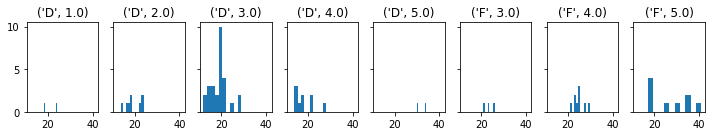

In [ ]:
fig, axs = plt.subplots(1,g.ngroups, sharey=True,sharex=True, tight_layout=True, figsize=(10, 2))
for i, (grp, d) in enumerate(g):
  axs[i].hist(d['mpg'])
  axs[i].set_title(grp)
  #axs[i].set_xticklabels('')
;

In [ ]:
g = auto.groupby(['rep78']) #subset data into n groups
g.ngroups

5

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([18. , 18.6, 19.2, 19.8, 20.4, 21. , 21.6, 22.2, 22.8, 23.4, 24. ]),
 <a list of 10 Patch objects>)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '1.0')

(array([1., 0., 1., 1., 2., 0., 0., 0., 1., 2.]),
 array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 10 Patch objects>)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '2.0')

(array([ 2.,  3.,  3.,  2., 10.,  4.,  0.,  1.,  0.,  2.]),
 array([12. , 13.7, 15.4, 17.1, 18.8, 20.5, 22.2, 23.9, 25.6, 27.3, 29. ]),
 <a list of 10 Patch objects>)

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '3.0')

(array([3., 1., 2., 0., 0., 2., 0., 0., 0., 1.]),
 array([14. , 15.4, 16.8, 18.2, 19.6, 21. , 22.4, 23.8, 25.2, 26.6, 28. ]),
 <a list of 10 Patch objects>)

(array([1., 0., 2., 1., 3., 0., 0., 1., 0., 1.]),
 array([21. , 21.9, 22.8, 23.7, 24.6, 25.5, 26.4, 27.3, 28.2, 29.1, 30. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '4.0')

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([30. , 30.4, 30.8, 31.2, 31.6, 32. , 32.4, 32.8, 33.2, 33.6, 34. ]),
 <a list of 10 Patch objects>)

(array([4., 0., 0., 1., 0., 1., 0., 2., 0., 1.]),
 array([17. , 19.4, 21.8, 24.2, 26.6, 29. , 31.4, 33.8, 36.2, 38.6, 41. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '5.0')

''

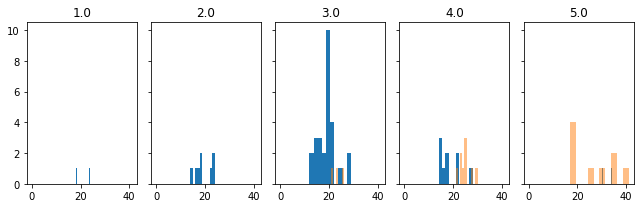

In [ ]:
fig, axs = plt.subplots(1,g.ngroups, sharex=True,sharey=True, tight_layout=True, figsize=(9, 3))
for i, (grp, d) in enumerate(g):
  axs[i].hist(d.mpg[d.foreign=="D"])  
  axs[i].hist(d.mpg[d.foreign=="F"],alpha=.5)
  axs[i].set_title(grp)
  #axs[i].set_xticklabels('')
;

foreign   D  F
rep78         
1.0       2  0
2.0       8  0
3.0      27  3
4.0       9  9
5.0       2  9

foreign
D    AxesSubplot(0.125,0.125;0.133621x0.755)
Name: mpg, dtype: object

Text(0.5, 1.0, '1.0')

foreign
D    AxesSubplot(0.285345,0.125;0.133621x0.755)
Name: mpg, dtype: object

Text(0.5, 1.0, '2.0')

foreign
D    AxesSubplot(0.44569,0.125;0.133621x0.755)
F    AxesSubplot(0.44569,0.125;0.133621x0.755)
Name: mpg, dtype: object

Text(0.5, 1.0, '3.0')

foreign
D    AxesSubplot(0.606034,0.125;0.133621x0.755)
F    AxesSubplot(0.606034,0.125;0.133621x0.755)
Name: mpg, dtype: object

Text(0.5, 1.0, '4.0')

foreign
D    AxesSubplot(0.766379,0.125;0.133621x0.755)
F    AxesSubplot(0.766379,0.125;0.133621x0.755)
Name: mpg, dtype: object

Text(0.5, 1.0, '5.0')

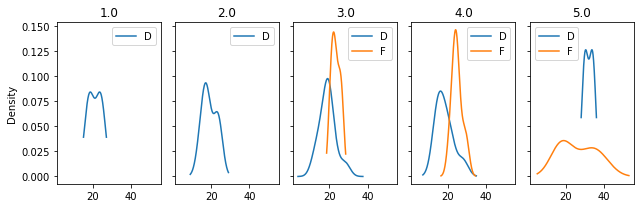

In [ ]:
#note hist easier understood with counts; density has density units on y axis
#and density is not relative density across groups, but within each group
#that density for F is higher than for D, as in cat 3, doesnt mean there are more F cars:
pd.crosstab(auto["rep78"], auto["foreign"])  
fig, axs = plt.subplots(1,g.ngroups,sharex=True, sharey=True, tight_layout=True, figsize=(9, 3))
for i, (grp, d) in enumerate(g):
  d.groupby(d.foreign)['mpg'].plot(kind='density', legend=True,bw_method=0.6,ax=axs[i]) #pandas
### separately below
  #d.mpg[d.foreign=="D"].plot.kde(ax=axs[i]);  
  #d.mpg[d.foreign=="D"].plot(kind = 'density',bw_method=0.4,ax=axs[i]) #pandas
  #try:
  #  d.mpg[d.foreign=="F"].plot(kind = 'density',bw_method=0.4, ax=axs[i]) #pandas #BUG brekas bc obs doesnt exist
  #except Exception: 
  #  pass
  #axs[i].hist(d.mpg[d.foreign=="D"])  
  #axs[i].hist(d.mpg[d.foreign=="F"],alpha=.5)
  axs[i].set_title(grp)
  #axs[i].set_xticklabels('')
#plt.legend(["D","F"],loc='upper left',borderpad=.1, labelspacing=.1);

### ggplot like matrix 2x2 etc of graphs 



may do sth like these and incorporate at some point

In [ ]:
#seaborn is fast and easy for complex subsetting; first gen a dummy:
auto['longHeavy'] = (auto.weight >= auto.weight.mean()) & (auto.length >= auto.length.mean())
#auto #make sure dummy makes sense, sort on different vars, and/or sum stats:
pd.pivot_table(auto, index=['longHeavy','foreign'], values= ['weight','length'] ,
               aggfunc=['mean','min','max']).round(1)

mean            min           max       
                  length  weight length weight length weight
longHeavy foreign                                           
False     D        172.1  2540.6    147   1800    195   3350
          F        166.2  2218.0    142   1760    189   2830
True      D        207.8  3694.3    193   3180    233   4840
          F        192.5  3295.0    192   3170    193   3420

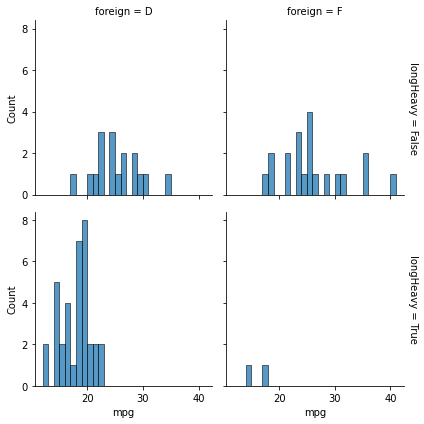

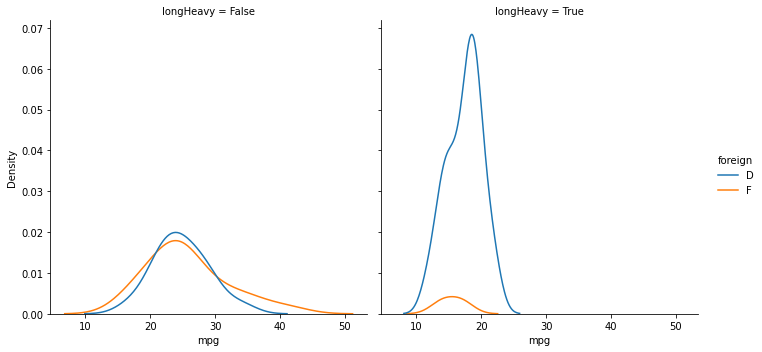

In [ ]:
sns.displot(auto, x="mpg", col="foreign", row="longHeavy", #note distplot is fig-level so cant do axs
    binwidth=1, height=3, facet_kws=dict(margin_titles=True)) #rather for quick and dirty explration than final meaningful polished
sns.displot(data=auto, x="mpg", hue="foreign", col="longHeavy",kind="kde"); #height=4, aspect=.7,
#g.set_axis_labels("Density", "mpg");

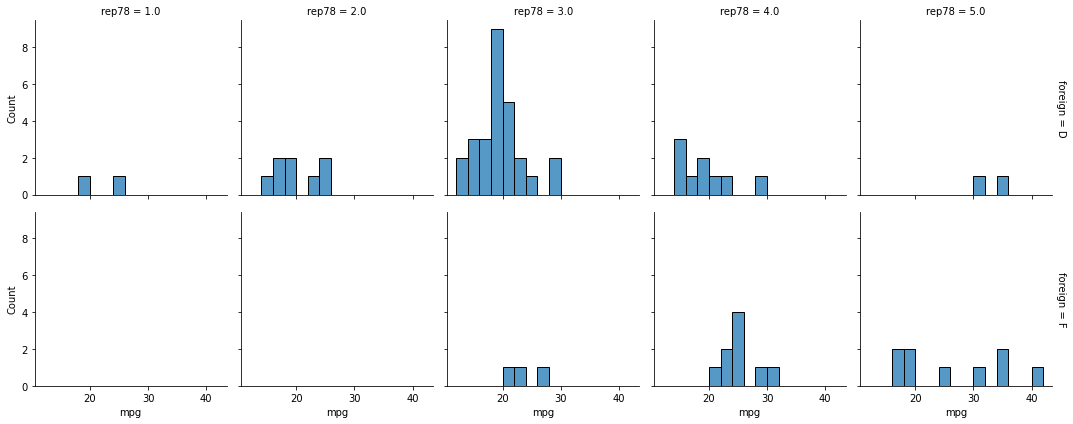

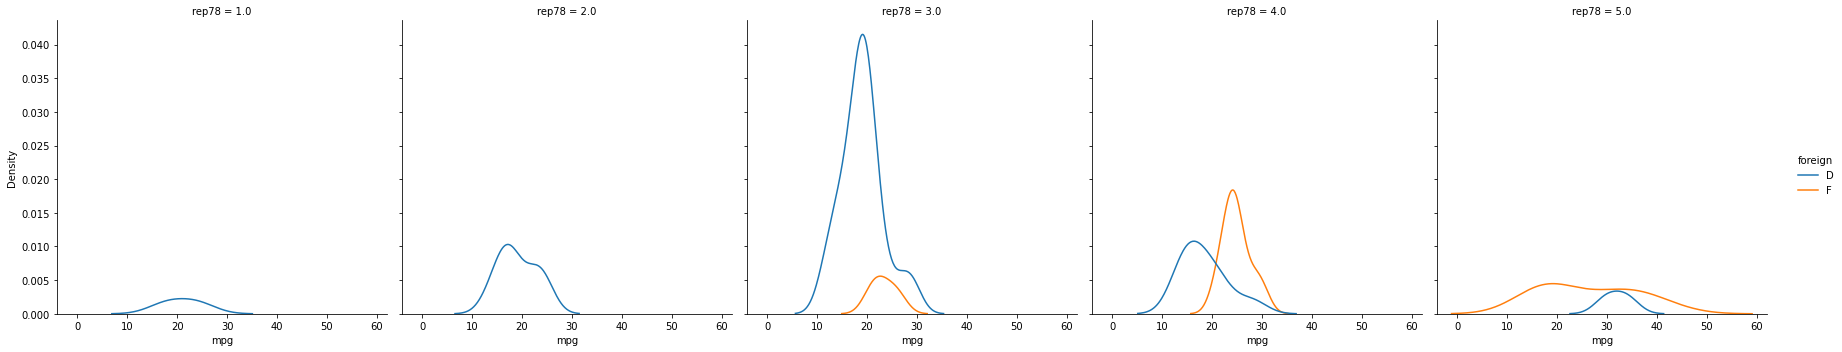

In [ ]:
sns.displot(auto, x="mpg", col="rep78", row="foreign",
    binwidth=2, height=3, facet_kws=dict(margin_titles=True),)
sns.displot(data=auto, x="mpg", hue="foreign", col="rep78",kind="kde");    #height=4, aspect=.7,
#g.set_axis_labels("Density", "mpg");
#g.set_titles("{col_name} rep78");

#### a more proper ggplot already in plotly.ipynb

### scatterplot labelling bug, and automatic adjustment of labels

In [ ]:
!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
auto=pd.read_stata('auto.dta'); auto.head(2)

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0  AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1    AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   

   displacement  gear_ratio   foreign  
0           121        3.58  Domestic  
1           258        2.53  Domestic

In [ ]:
auto=auto.sort_values('weight') #BUG! it feaking puts text where make is a-z for cars sorted on index!

In [ ]:
auto[['make','weight','mpg']]

make  weight  mpg
0     AMC Concord    2930   22
1       AMC Pacer    3350   17
2      AMC Spirit    2640   22
3   Buick Century    3250   20
4   Buick Electra    4080   15
..            ...     ...  ...
69      VW Dasher    2160   23
70      VW Diesel    2040   41
71      VW Rabbit    1930   25
72    VW Scirocco    1990   25
73      Volvo 260    3170   17

[74 rows x 3 columns]

In [ ]:
for i, txt in enumerate(auto['make']):
    print(txt, (auto['weight'][i],auto['mpg'][i]))

Honda Civic (2930, 22)
Ford Fiesta (3350, 17)
Plym. Champ (2640, 22)
Renault Le Car (3250, 20)
VW Rabbit (4080, 15)
Mazda GLC (3670, 18)
VW Scirocco (2230, 26)
Datsun 210 (3280, 20)
VW Diesel (3880, 16)
Subaru (3400, 19)
Audi Fox (4330, 14)
Chev. Chevette (3900, 14)
Dodge Colt (4290, 21)
Fiat Strada (2110, 29)
VW Dasher (3690, 16)
Plym. Horizon (3180, 22)
Toyota Corolla (3220, 22)
Buick Opel (2750, 24)
Honda Accord (3430, 19)
Datsun 510 (2120, 30)
Datsun 200 (3600, 18)
Toyota Celica (3600, 16)
Plym. Sapporo (3740, 17)
Merc. Bobcat (1800, 28)
AMC Spirit (2650, 21)
Ford Mustang (4840, 12)
BMW 320i (4720, 12)
Toyota Corona (3830, 14)
Pont. Sunbird (2580, 22)
Olds Starfire (4060, 14)
Datsun 810 (3720, 15)
Chev. Monza (3370, 18)
Merc. Zephyr (4130, 14)
Audi 5000 (2830, 20)
AMC Concord (4060, 21)
Volvo 260 (3310, 19)
Chev. Malibu (3300, 19)
Pont. Le Mans (3690, 18)
Pont. Grand Prix (3370, 19)
Chev. Monte Carlo (2730, 24)
Buick Century (4030, 16)
Plym. Arrow (3260, 28)
Buick Regal (1800, 34)


In [ ]:
auto=auto.sort_values('make') #BUG too
for i, txt in enumerate(auto['make']):
    print(txt, (auto['weight'][i],auto['mpg'][i]))

AMC Concord (2930, 22)
AMC Pacer (3350, 17)
AMC Spirit (2640, 22)
Audi 5000 (3250, 20)
Audi Fox (4080, 15)
BMW 320i (3670, 18)
Buick Century (2230, 26)
Buick Electra (3280, 20)
Buick LeSabre (3880, 16)
Buick Opel (3400, 19)
Buick Regal (4330, 14)
Buick Riviera (3900, 14)
Buick Skylark (4290, 21)
Cad. Deville (2110, 29)
Cad. Eldorado (3690, 16)
Cad. Seville (3180, 22)
Chev. Chevette (3220, 22)
Chev. Impala (2750, 24)
Chev. Malibu (3430, 19)
Chev. Monte Carlo (2120, 30)
Chev. Monza (3600, 18)
Chev. Nova (3600, 16)
Datsun 200 (3740, 17)
Datsun 210 (1800, 28)
Datsun 510 (2650, 21)
Datsun 810 (4840, 12)
Dodge Colt (4720, 12)
Dodge Diplomat (3830, 14)
Dodge Magnum (2580, 22)
Dodge St. Regis (4060, 14)
Fiat Strada (3720, 15)
Ford Fiesta (3370, 18)
Ford Mustang (4130, 14)
Honda Accord (2830, 20)
Honda Civic (4060, 21)
Linc. Continental (3310, 19)
Linc. Mark V (3300, 19)
Linc. Versailles (3690, 18)
Mazda GLC (3370, 19)
Merc. Bobcat (2730, 24)
Merc. Cougar (4030, 16)
Merc. Marquis (3260, 28)
Mer

In [ ]:
auto=auto.sort_index() #this works
for i, txt in enumerate(auto['make']):
    print(txt, (auto['weight'][i],auto['mpg'][i]))

AMC Concord (2930, 22)
AMC Pacer (3350, 17)
AMC Spirit (2640, 22)
Buick Century (3250, 20)
Buick Electra (4080, 15)
Buick LeSabre (3670, 18)
Buick Opel (2230, 26)
Buick Regal (3280, 20)
Buick Riviera (3880, 16)
Buick Skylark (3400, 19)
Cad. Deville (4330, 14)
Cad. Eldorado (3900, 14)
Cad. Seville (4290, 21)
Chev. Chevette (2110, 29)
Chev. Impala (3690, 16)
Chev. Malibu (3180, 22)
Chev. Monte Carlo (3220, 22)
Chev. Monza (2750, 24)
Chev. Nova (3430, 19)
Dodge Colt (2120, 30)
Dodge Diplomat (3600, 18)
Dodge Magnum (3600, 16)
Dodge St. Regis (3740, 17)
Ford Fiesta (1800, 28)
Ford Mustang (2650, 21)
Linc. Continental (4840, 12)
Linc. Mark V (4720, 12)
Linc. Versailles (3830, 14)
Merc. Bobcat (2580, 22)
Merc. Cougar (4060, 14)
Merc. Marquis (3720, 15)
Merc. Monarch (3370, 18)
Merc. XR-7 (4130, 14)
Merc. Zephyr (2830, 20)
Olds 98 (4060, 21)
Olds Cutl Supr (3310, 19)
Olds Cutlass (3300, 19)
Olds Delta 88 (3690, 18)
Olds Omega (3370, 19)
Olds Starfire (2730, 24)
Olds Toronado (4030, 16)
Plym. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   make    74 non-null     object
 1   weight  74 non-null     int16 
 2   mpg     74 non-null     int16 
dtypes: int16(2), object(1)
memory usage: 1.4+ KB


Text(2930, 22, 'AMC Concord')

Text(3350, 17, 'AMC Pacer')

Text(2640, 22, 'AMC Spirit')

Text(3250, 20, 'Buick Century')

Text(4080, 15, 'Buick Electra')

Text(3670, 18, 'Buick LeSabre')

Text(2230, 26, 'Buick Opel')

Text(3280, 20, 'Buick Regal')

Text(3880, 16, 'Buick Riviera')

Text(3400, 19, 'Buick Skylark')

Text(4330, 14, 'Cad. Deville')

Text(3900, 14, 'Cad. Eldorado')

Text(4290, 21, 'Cad. Seville')

Text(2110, 29, 'Chev. Chevette')

Text(3690, 16, 'Chev. Impala')

Text(3180, 22, 'Chev. Malibu')

Text(3220, 22, 'Chev. Monte Carlo')

Text(2750, 24, 'Chev. Monza')

Text(3430, 19, 'Chev. Nova')

Text(2120, 30, 'Dodge Colt')

Text(3600, 18, 'Dodge Diplomat')

Text(3600, 16, 'Dodge Magnum')

Text(3740, 17, 'Dodge St. Regis')

Text(1800, 28, 'Ford Fiesta')

Text(2650, 21, 'Ford Mustang')

Text(4840, 12, 'Linc. Continental')

Text(4720, 12, 'Linc. Mark V')

Text(3830, 14, 'Linc. Versailles')

Text(2580, 22, 'Merc. Bobcat')

Text(4060, 14, 'Merc. Cougar')

Text(3720, 15, 'Merc. Marquis')

Text(3370, 18, 'Merc. Monarch')

Text(4130, 14, 'Merc. XR-7')

Text(2830, 20, 'Merc. Zephyr')

Text(4060, 21, 'Olds 98')

Text(3310, 19, 'Olds Cutl Supr')

Text(3300, 19, 'Olds Cutlass')

Text(3690, 18, 'Olds Delta 88')

Text(3370, 19, 'Olds Omega')

Text(2730, 24, 'Olds Starfire')

Text(4030, 16, 'Olds Toronado')

Text(3260, 28, 'Plym. Arrow')

Text(1800, 34, 'Plym. Champ')

Text(2200, 25, 'Plym. Horizon')

Text(2520, 26, 'Plym. Sapporo')

Text(3330, 18, 'Plym. Volare')

Text(3700, 18, 'Pont. Catalina')

Text(3470, 18, 'Pont. Firebird')

Text(3210, 19, 'Pont. Grand Prix')

Text(3200, 19, 'Pont. Le Mans')

Text(3420, 19, 'Pont. Phoenix')

Text(2690, 24, 'Pont. Sunbird')

Text(2830, 17, 'Audi 5000')

Text(2070, 23, 'Audi Fox')

Text(2650, 25, 'BMW 320i')

Text(2370, 23, 'Datsun 200')

Text(2020, 35, 'Datsun 210')

Text(2280, 24, 'Datsun 510')

Text(2750, 21, 'Datsun 810')

Text(2130, 21, 'Fiat Strada')

Text(2240, 25, 'Honda Accord')

Text(1760, 28, 'Honda Civic')

Text(1980, 30, 'Mazda GLC')

Text(3420, 14, 'Peugeot 604')

Text(1830, 26, 'Renault Le Car')

Text(2050, 35, 'Subaru')

Text(2410, 18, 'Toyota Celica')

Text(2200, 31, 'Toyota Corolla')

Text(2670, 18, 'Toyota Corona')

Text(2160, 23, 'VW Dasher')

Text(2040, 41, 'VW Diesel')

Text(1930, 25, 'VW Rabbit')

Text(1990, 25, 'VW Scirocco')

Text(3170, 17, 'Volvo 260')

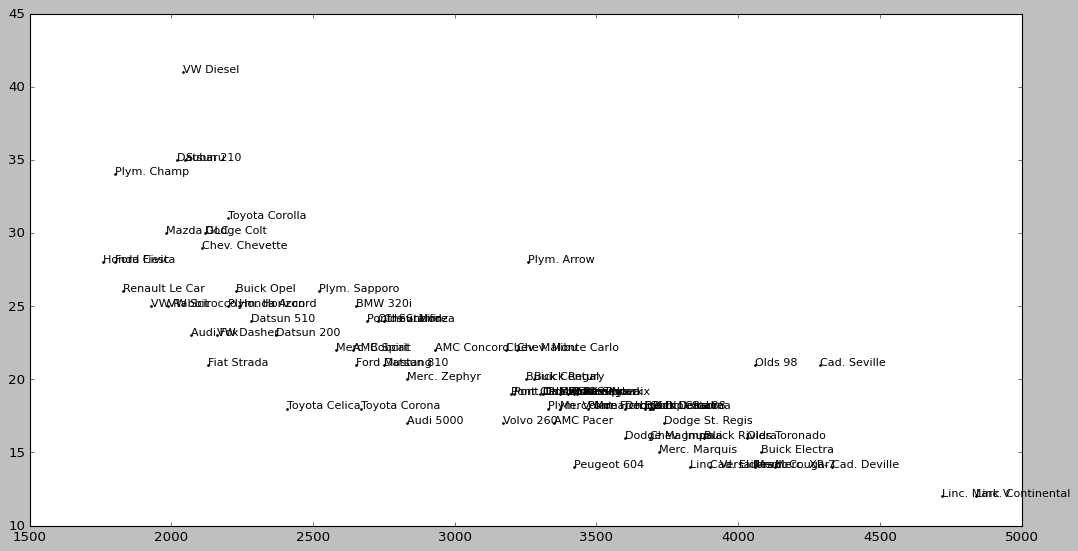

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
auto=auto.sort_index() 
auto[['make','weight','mpg']].info() 

ax.scatter(auto['weight'],auto['mpg'],s=2)

for i, txt in enumerate(auto['make']):
    ax.annotate(txt, (auto['weight'][i],auto['mpg'][i]),fontsize=10)

next 2 cells already in all ipynb

In [ ]:
#fancy! can automatically adjust text with this package
!pip install adjustText 
from adjustText import adjust_text
#https://adjusttext.readthedocs.io/en/latest/Examples.html
#https://www.python-graph-gallery.com/web-text-repel-with-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=28db98f85f76396bb5d34c044ea2b663d72afb84c5331eff7148c3541fc23b47
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   make    74 non-null     object
 1   weight  74 non-null     int16 
 2   mpg     74 non-null     int16 
dtypes: int16(2), object(1)
memory usage: 3.5+ KB


111

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

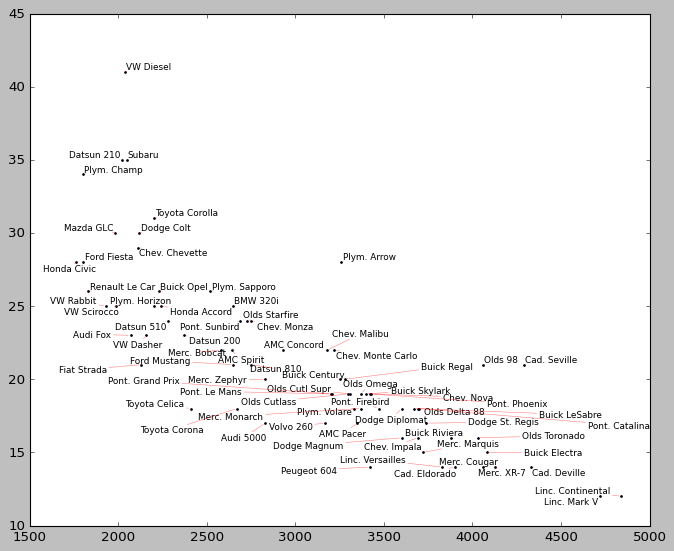

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
auto=auto.sort_index() 
auto[['make','weight','mpg']].info() 

ax.scatter(auto['weight'],auto['mpg'],s=2)
#before adj text need to make a list of labels to feed into adjust_text function
#sth like this with loop and append, but the format not right for the adjust_text
#texts=[]
#for i, txt in enumerate(auto['make']):
#    texts.append([txt, (auto['weight'][i],auto['mpg'][i])])
#this works as list comprehension
texts = [plt.text(auto['weight'][i],auto['mpg'][i], auto['make'][i],fontsize=8) for i in range(len(auto))]
adjust_text(texts,arrowprops=dict(arrowstyle='-', color='red', alpha=.5,lw=.5))
plt.savefig('scLab.pdf')
files.download('scLab.pdf') #download and open in pdf viewer and zoom in, quality!

### clickable mpl

note there is also ipympl backend for %matplotlib and played with widget below; but can just use plotly see plotly.ipyndb in github/vis

In [ ]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [ ]:
!pip install mpld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 KB 10.1 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

Text(2930, 22, 'AMC Concord')

Text(3350, 17, 'AMC Pacer')

Text(2640, 22, 'AMC Spirit')

Text(3250, 20, 'Buick Century')

Text(4080, 15, 'Buick Electra')

Text(3670, 18, 'Buick LeSabre')

Text(2230, 26, 'Buick Opel')

Text(3280, 20, 'Buick Regal')

Text(3880, 16, 'Buick Riviera')

Text(3400, 19, 'Buick Skylark')

Text(4330, 14, 'Cad. Deville')

Text(3900, 14, 'Cad. Eldorado')

Text(4290, 21, 'Cad. Seville')

Text(2110, 29, 'Chev. Chevette')

Text(3690, 16, 'Chev. Impala')

Text(3180, 22, 'Chev. Malibu')

Text(3220, 22, 'Chev. Monte Carlo')

Text(2750, 24, 'Chev. Monza')

Text(3430, 19, 'Chev. Nova')

Text(2120, 30, 'Dodge Colt')

Text(3600, 18, 'Dodge Diplomat')

Text(3600, 16, 'Dodge Magnum')

Text(3740, 17, 'Dodge St. Regis')

Text(1800, 28, 'Ford Fiesta')

Text(2650, 21, 'Ford Mustang')

Text(4840, 12, 'Linc. Continental')

Text(4720, 12, 'Linc. Mark V')

Text(3830, 14, 'Linc. Versailles')

Text(2580, 22, 'Merc. Bobcat')

Text(4060, 14, 'Merc. Cougar')

Text(3720, 15, 'Merc. Marquis')

Text(3370, 18, 'Merc. Monarch')

Text(4130, 14, 'Merc. XR-7')

Text(2830, 20, 'Merc. Zephyr')

Text(4060, 21, 'Olds 98')

Text(3310, 19, 'Olds Cutl Supr')

Text(3300, 19, 'Olds Cutlass')

Text(3690, 18, 'Olds Delta 88')

Text(3370, 19, 'Olds Omega')

Text(2730, 24, 'Olds Starfire')

Text(4030, 16, 'Olds Toronado')

Text(3260, 28, 'Plym. Arrow')

Text(1800, 34, 'Plym. Champ')

Text(2200, 25, 'Plym. Horizon')

Text(2520, 26, 'Plym. Sapporo')

Text(3330, 18, 'Plym. Volare')

Text(3700, 18, 'Pont. Catalina')

Text(3470, 18, 'Pont. Firebird')

Text(3210, 19, 'Pont. Grand Prix')

Text(3200, 19, 'Pont. Le Mans')

Text(3420, 19, 'Pont. Phoenix')

Text(2690, 24, 'Pont. Sunbird')

Text(2830, 17, 'Audi 5000')

Text(2070, 23, 'Audi Fox')

Text(2650, 25, 'BMW 320i')

Text(2370, 23, 'Datsun 200')

Text(2020, 35, 'Datsun 210')

Text(2280, 24, 'Datsun 510')

Text(2750, 21, 'Datsun 810')

Text(2130, 21, 'Fiat Strada')

Text(2240, 25, 'Honda Accord')

Text(1760, 28, 'Honda Civic')

Text(1980, 30, 'Mazda GLC')

Text(3420, 14, 'Peugeot 604')

Text(1830, 26, 'Renault Le Car')

Text(2050, 35, 'Subaru')

Text(2410, 18, 'Toyota Celica')

Text(2200, 31, 'Toyota Corolla')

Text(2670, 18, 'Toyota Corona')

Text(2160, 23, 'VW Dasher')

Text(2040, 41, 'VW Diesel')

Text(1930, 25, 'VW Rabbit')

Text(1990, 25, 'VW Scirocco')

Text(3170, 17, 'Volvo 260')

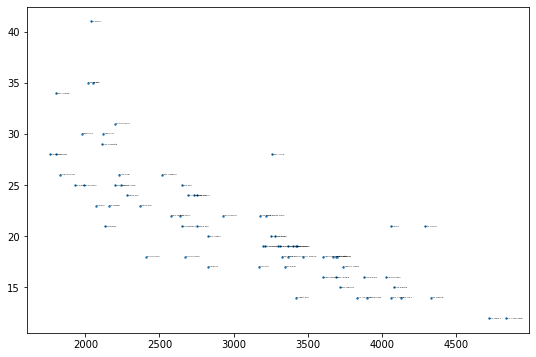

In [ ]:
auto=auto.sort_index() 
#auto[['make','weight','mpg']].info() 
fig, ax = plt.subplots(figsize=(9, 6)) 

ax.scatter(auto['weight'],auto['mpg'],s=2)

for i, txt in enumerate(auto['make']):
    ax.annotate(txt, (auto['weight'][i],auto['mpg'][i]),fontsize=2)
plt.show()

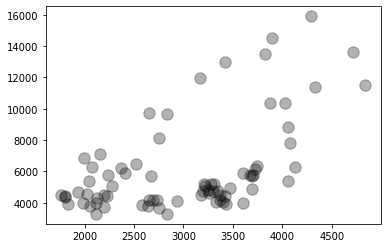

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4)) 
ax.scatter(auto.weight,auto.price, c='black', s=130, alpha=0.3)
plt.show()

#### sstuff below doesnt work

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(6, 4)) 
ax.scatter(auto.weight,auto.price, c='black', s=130, alpha=0.3)
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
%matplotlib notebookplt.plot(auto.mpg,auto.price)

KeyError: ignored

In [ ]:
!pip install ipympl #http://webcache.googleusercontent.com/search?q=cache:bD6gFYSqMTcJ:https://towardsdatascience.com/render-interactive-plots-with-matplotlib-2cf0918d89c9&hl=en&gl=us&strip=1&vwsrc=0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.3/510.3 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 67.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
%matplotlib widget


In [ ]:
import matplotlib.pyplot as plt
%matplotlib widgetplt.plot([1,2,3,4,5,6,7], [10, 50, 100, 23,15,28,45])

UsageError: unrecognized arguments: [10, 50, 100, 23,15,28,45])


In [ ]:
#https://matplotlib.org/stable/users/explain/interactive.html
%matplotlib

Using matplotlib backend: agg


In [ ]:
fig, ax = plt.subplots()
ln, = ax.plot(range(5))
ln.set_color('orange')

plt.ion()
plt.show()

## clustering

LATER/TODO/REFS:

https://scikit-learn.org/stable/modules/clustering.html technical comprehensive

https://realpython.com/k-means-clustering-python/ quite descriptive

https://martinfleischmann.net/clustergam-visualisation-of-cluster-analysis/ sth little different this clustergram may give it a try at some point

https://builtin.com/data-science/data-clustering-python realtively straightforward and shows how to do elbow graph and first calculate WCSS; but it should be in some package already!

https://www.kaggle.com/code/dhanyajothimani/basic-visualization-and-clustering-in-python nothing really new neither seems much rigor but may do at some point as real life application to soc sci data

TODO!!! definitely go through these examples
https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%207%20-%20Unsupervised%20Learning.ipynb
and see pdf of the book in py/books

<br><br>
MCA

https://napsterinblue.github.io/notes/stats/techniques/mca/

https://stackoverflow.com/questions/67391441/obtaining-multiple-correspondence-analysis-mca-plot-in-python-using-prince-pac

https://stackoverflow.com/questions/48521740/using-mca-package-in-python

### dendograms

In [ ]:
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download') 

In [ ]:
#im new to clustering so to figure it out i just keep couple vars and 2 dozens cars
df = auto[['make','weight','price','mpg']].set_index('make') # 'turn','displacement','trunk','rep78','gear_ratio' #'make','mpg','weight','length','price','turn','displacement','trunk','rep78','gear_ratio'
ind_list = ['Cad. Deville','Cad. Eldorado','Cad. Seville','Chev. Chevette','Chev. Impala','Chev. Malibu','Dodge Colt','Ford Fiesta','Linc. Continental','Linc. Mark V','Olds 98','Plym. Arrow','Plym. Champ','Datsun 210','Datsun 510','Datsun 810','Honda Accord','Honda Civic','Toyota Celica','Toyota Corolla','VW Diesel']
df=df.loc[ind_list]

In [ ]:
df[:].style.background_gradient(cmap="RdYlGn")

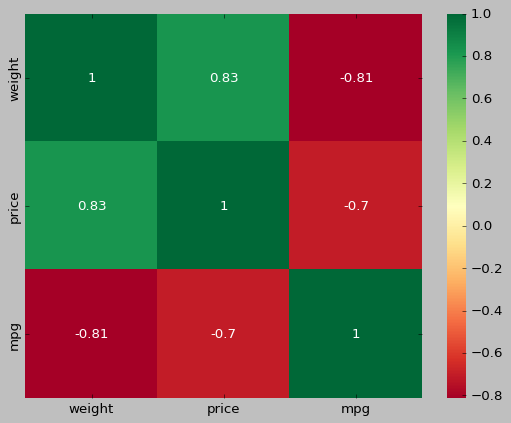

In [ ]:
sns.heatmap(df.corr().round(2),cmap="RdYlGn",annot=True)

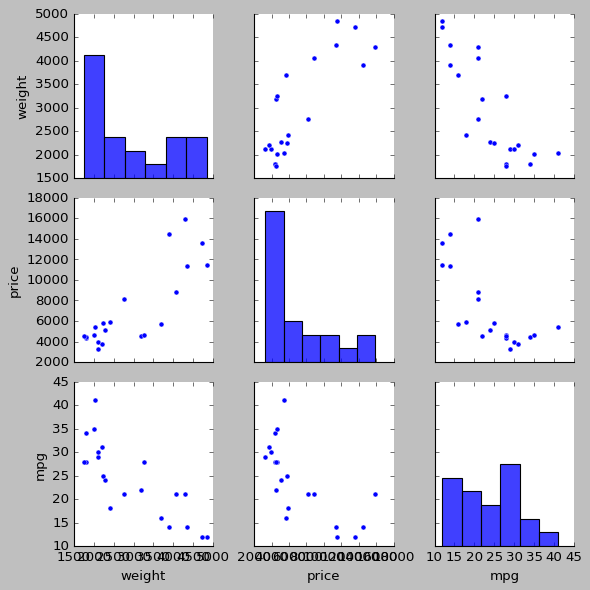

In [ ]:
sns.pairplot(df)

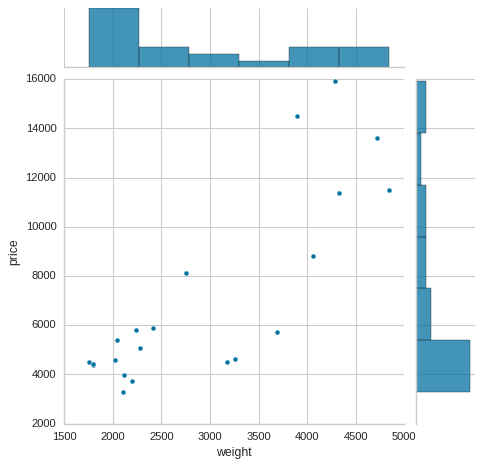

In [ ]:
sns.jointplot(x ='weight', y ='price', data = df); #, kind ='kde' 

In [ ]:
df = auto[['make','weight','price']].set_index(['make','weight','price'],drop=False) # 'turn','displacement','trunk','rep78','gear_ratio' #'make','mpg','weight','length','price','turn','displacement','trunk','rep78','gear_ratio'
df=df.loc[ind_list]
df.drop(columns='make',inplace=True)

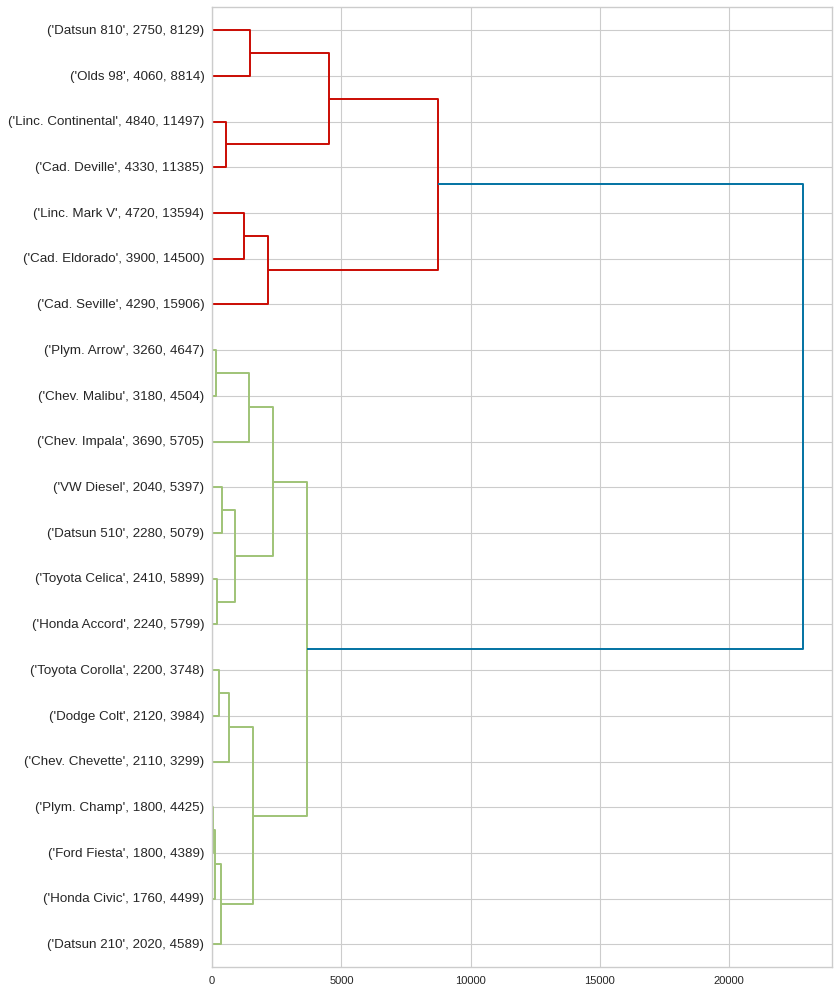

In [ ]:

from scipy.cluster import hierarchy #normally always at the top; but here just used locally for this sub-sec 

fig, ax = plt.subplots(figsize = (10, 15))

#bunch of vars:
Z = hierarchy.linkage(df, 'ward') # Calculate the distance between each sample
hierarchy.dendrogram(Z, orientation="right", labels=df.index,leaf_font_size=12,ax=ax);

In [ ]:
!pip install adjustText 
from adjustText import adjust_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = auto[['make','weight','price']].set_index(['make'],drop=False) # 'turn','displacement','trunk','rep78','gear_ratio' #'make','mpg','weight','length','price','turn','displacement','trunk','rep78','gear_ratio'
df=df.loc[ind_list]

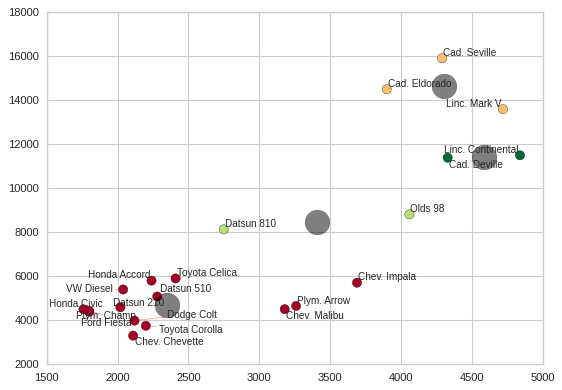

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import silhouette_visualizer

kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['weight','price']])
y_kmeans = kmeans.predict(df[['weight','price']])

fig, ax = plt.subplots()
ax.scatter(df.weight,df.price,c=y_kmeans,s=70, cmap='RdYlGn')

texts = [plt.text(df['weight'][i],df['price'][i], df['make'][i],fontsize=9) for i in range(len(df))]
adjust_text(texts,arrowprops=dict(arrowstyle='-', color='red', alpha=.5,lw=.5)) #and there's ton of options to tweak it more

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5);

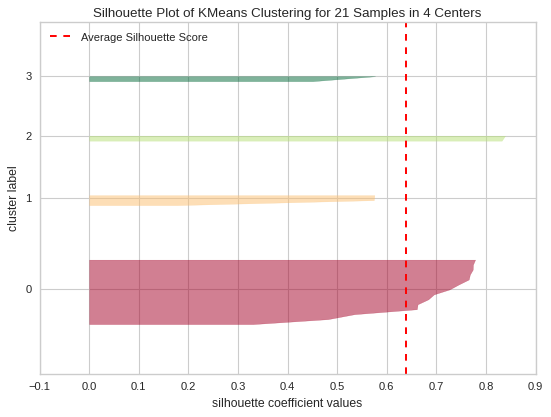

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f832e82a6d0>,
                     colors='RdYlGn',
                     estimator=KMeans(n_clusters=4, random_state=42))

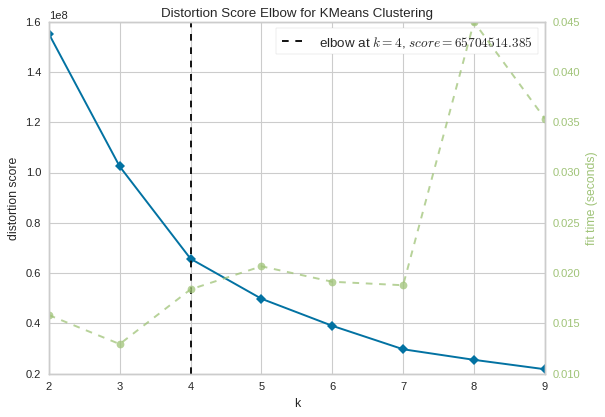

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f8331cb0ee0>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [ ]:
silhouette_visualizer(KMeans(4, random_state=42), df[['weight','price']], colors='RdYlGn') #higher vals=better separation between clusters
kelbow_visualizer(KMeans(random_state=4), auto[['weight','price']], k=(2,10))

>>>pick up here

In [ ]:
df = auto[['make','mpg','weight','length','price','turn','displacement','trunk']][0:30].set_index(['make','mpg','price'],drop=False) 
df

make  mpg  weight  length  price  \
make              mpg price                                                  
AMC Concord       22  4099         AMC Concord   22    2930     186   4099   
AMC Pacer         17  4749           AMC Pacer   17    3350     173   4749   
AMC Spirit        22  3799          AMC Spirit   22    2640     168   3799   
Buick Century     20  4816       Buick Century   20    3250     196   4816   
Buick Electra     15  7827       Buick Electra   15    4080     222   7827   
Buick LeSabre     18  5788       Buick LeSabre   18    3670     218   5788   
Buick Opel        26  4453          Buick Opel   26    2230     170   4453   
Buick Regal       20  5189         Buick Regal   20    3280     200   5189   
Buick Riviera     16  10372      Buick Riviera   16    3880     207  10372   
Buick Skylark     19  4082       Buick Skylark   19    3400     200   4082   
Cad. Deville      14  11385       Cad. Deville   14    4330     221  11385   
Cad. Eldorado     14  14500      Cad. Eldorado   14    3900     204  14500   
Cad. Seville      21  15906       Cad. Seville   21    4290     204  15906   
Chev. Chevette    29  3299      Chev. Chevette   29    2110     163   3299   
Chev. Impala      16  5705        Chev. Impala   16    3690     212   5705   
Chev. Malibu      22  4504        Chev. Malibu   22    3180     193   4504   
Chev. Monte Carlo 22  5104   Chev. Monte Carlo   22    3220     200   5104   
Chev. Monza       24  3667         Chev. Monza   24    2750     179   3667   
Chev. Nova        19  3955          Chev. Nova   19    3430     197   3955   
Dodge Colt        30  3984          Dodge Colt   30    2120     163   3984   
Dodge Diplomat    18  4010      Dodge Diplomat   18    3600     206   4010   
Dodge Magnum      16  5886        Dodge Magnum   16    3600     206   5886   
Dodge St. Regis   17  6342     Dodge St. Regis   17    3740     220   6342   
Ford Fiesta       28  4389         Ford Fiesta   28    1800     147   4389   
Ford Mustang      21  4187        Ford Mustang   21    2650     179   4187   
Linc. Continental 12  11497  Linc. Continental   12    4840     233  11497   
Linc. Mark V      12  13594       Linc. Mark V   12    4720     230  13594   
Linc. Versailles  14  13466   Linc. Versailles   14    3830     201  13466   
Merc. Bobcat      22  3829        Merc. Bobcat   22    2580     169   3829   
Merc. Cougar      14  5379        Merc. Cougar   14    4060     221   5379   

                             turn  displacement  trunk  
make              mpg price                             
AMC Concord       22  4099     40           121     11  
AMC Pacer         17  4749     40           258     11  
AMC Spirit        22  3799     35           121     12  
Buick Century     20  4816     40           196     16  
Buick Electra     15  7827     43           350     20  
Buick LeSabre     18  5788     43           231     21  
Buick Opel        26  4453     34           304     10  
Buick Regal       20  5189     42           196     16  
Buick Riviera     16  10372    43           231     17  
Buick Skylark     19  4082     42           231     13  
Cad. Deville      14  11385    44           425     20  
Cad. Eldorado     14  14500    43           350     16  
Cad. Seville      21  15906    45           350     13  
Chev. Chevette    29  3299     34           231      9  
Chev. Impala      16  5705     43           250     20  
Chev. Malibu      22  4504     31           200     17  
Chev. Monte Carlo 22  5104     41           200     16  
Chev. Monza       24  3667     40           151      7  
Chev. Nova        19  3955     43           250     13  
Dodge Colt        30  3984     35            98      8  
Dodge Diplomat    18  4010     46           318     17  
Dodge Magnum      16  5886     46           318     17  
Dodge St. Regis   17  6342     46           225     21  
Ford Fiesta       28  4389     33            98      9  
Ford Mustang      21  4187     43           140     10  
Linc. 

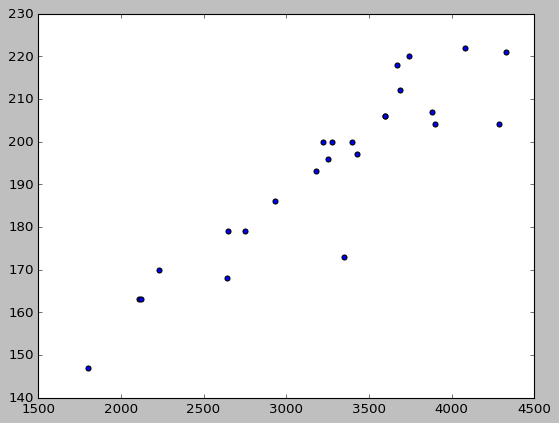

In [ ]:
plt.scatter(df.weight,df.length)

In [ ]:
#for simplicity just mpg price
Z = hierarchy.linkage(df[['mpg','price']], 'ward') # Calculate the distance between each sample
hierarchy.dendrogram(Z, orientation="right", labels=df[['make','mpg','price']],leaf_font_size=12,ax=ax);

#### https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/?


TODO/MAYBE:

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/theaok/vis/main/wholesaleCustomers.csv')

In [ ]:
from sklearn.preprocessing import normalize
dfs = normalize(df)
dfs = pd.DataFrame(dfs, columns=df.columns)
dfs .head()
#if we dont normalize, those with higher values may be given greater importance

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2  0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3  0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4  0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   

   Detergents_Paper  Delicassen  
0          0.149505    0.074809  
1          0.206342    0.111286  
2          0.219467    0.489619  
3          0.032749    0.115494  
4          0.070358    0.205294

In [ ]:
dfs.describe().round(2).T

count  mean   std   min   25%   50%   75%   max
Channel           440.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00
Region            440.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00
Fresh             440.0  0.61  0.34  0.00  0.29  0.72  0.93  1.00
Milk              440.0  0.31  0.22  0.01  0.12  0.25  0.46  0.93
Grocery           440.0  0.41  0.27  0.00  0.16  0.38  0.65  0.98
Frozen            440.0  0.19  0.20  0.00  0.05  0.11  0.24  0.94
Detergents_Paper  440.0  0.14  0.15  0.00  0.02  0.06  0.24  0.90
Delicassen        440.0  0.09  0.09  0.00  0.03  0.06  0.12  0.64

<Figure size 800x560 with 0 Axes>

Text(0.5, 1.0, 'Dendrograms')

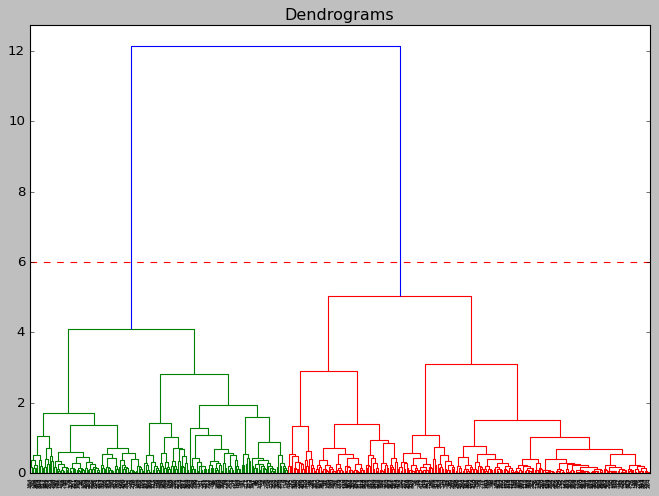

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
plt.axhline(y=6, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(dfs, method='ward'))
#y-axis represents the distance between these samples

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

<Figure size 800x560 with 0 Axes>

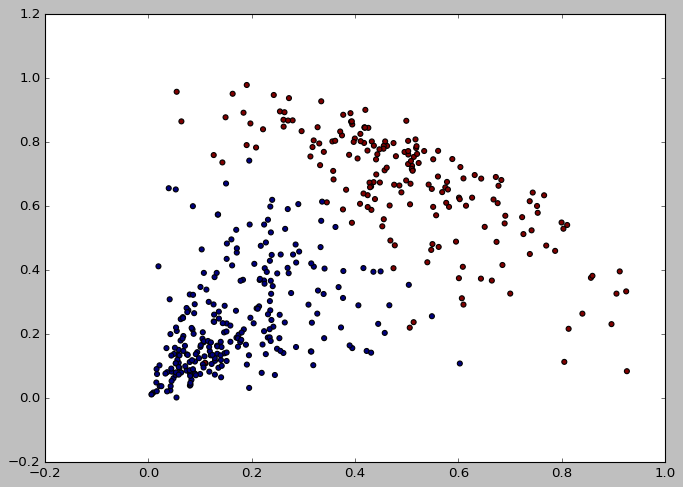

In [ ]:
#so guess 2 clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(dfs)
plt.figure(figsize=(10, 7))  
plt.scatter(dfs['Milk'], dfs['Grocery'], c=cluster.labels_) 

### k-means auto (have this in all.ipynb)


REF:
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

https://www.reneshbedre.com/blog/kmeans-clustering-python.html

https://www.scikit-yb.org/en/latest/index.html

TODO/MAYBE
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/


In [ ]:
auto.describe().T.round(2)

count     mean      std      min      25%      50%      75%  \
price          74.0  6165.26  2949.50  3291.00  4220.25  5006.50  6332.25   
mpg            74.0    21.30     5.79    12.00    18.00    20.00    24.75   
rep78          69.0     3.41     0.99     1.00     3.00     3.00     4.00   
headroom       74.0     2.99     0.85     1.50     2.50     3.00     3.50   
trunk          74.0    13.76     4.28     5.00    10.25    14.00    16.75   
weight         74.0  3019.46   777.19  1760.00  2250.00  3190.00  3600.00   
length         74.0   187.93    22.27   142.00   170.00   192.50   203.75   
turn           74.0    39.65     4.40    31.00    36.00    40.00    43.00   
displacement   74.0   197.30    91.84    79.00   119.00   196.00   245.25   
gear_ratio     74.0     3.01     0.46     2.19     2.73     2.96     3.35   

                   max  
price         15906.00  
mpg              41.00  
rep78             5.00  
headroom          5.00  
trunk            23.00  
weight         4840.00  
length          233.00  
turn             51.00  
displacement    425.00  
gear_ratio        3.89

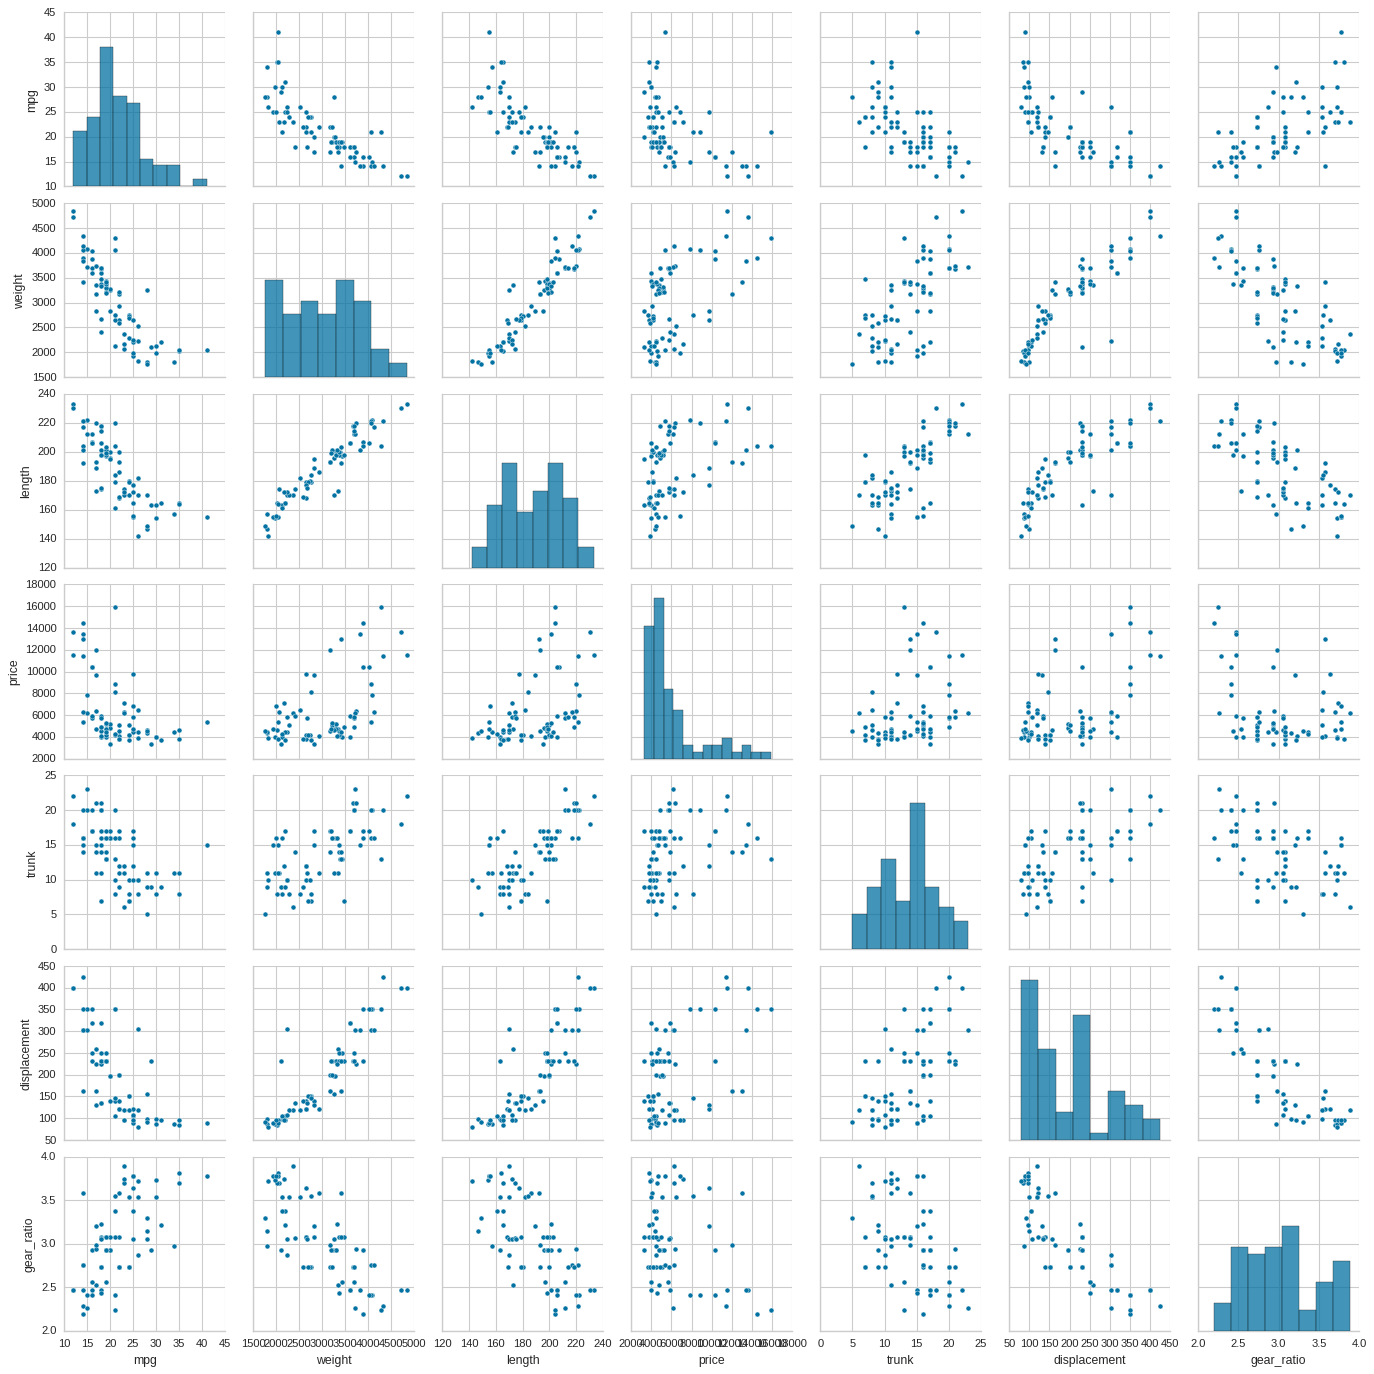

In [ ]:
sns.pairplot(auto[['mpg','weight','length','price','trunk','displacement','gear_ratio']]) #eyball to see where we can get some clusters

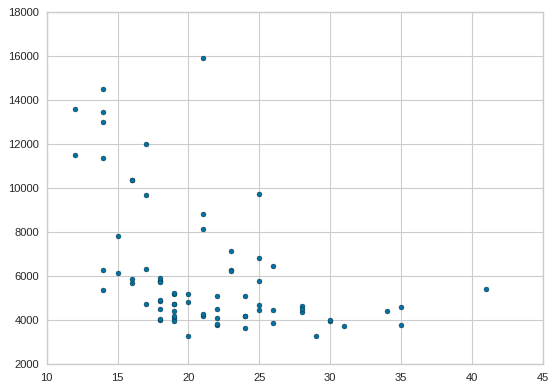

In [ ]:
fig, ax = plt.subplots()
ax.scatter(auto.mpg,auto.price); #either 2 or 4

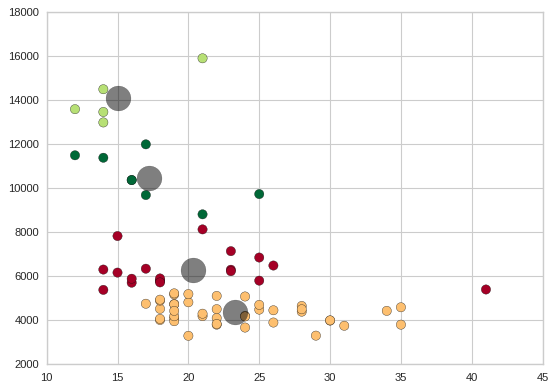

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(auto[['mpg','price']])
y_kmeans = kmeans.predict(auto[['mpg','price']])

fig, ax = plt.subplots()
ax.scatter(auto.mpg,auto.price,c=y_kmeans,s=70, cmap='RdYlGn')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5);

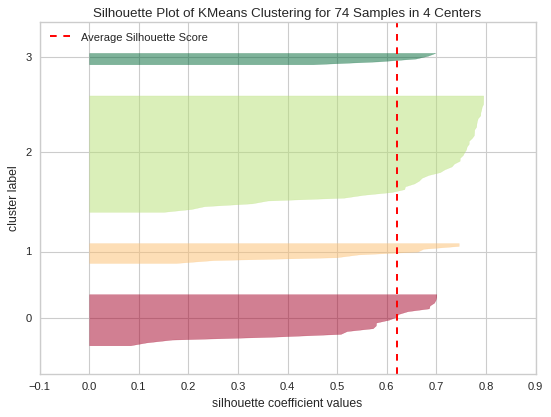

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f98bbe26430>,
                     colors='RdYlGn',
                     estimator=KMeans(n_clusters=4, random_state=42))

In [ ]:
silhouette_visualizer(KMeans(4, random_state=42), auto[['mpg','price']], colors='RdYlGn') #2

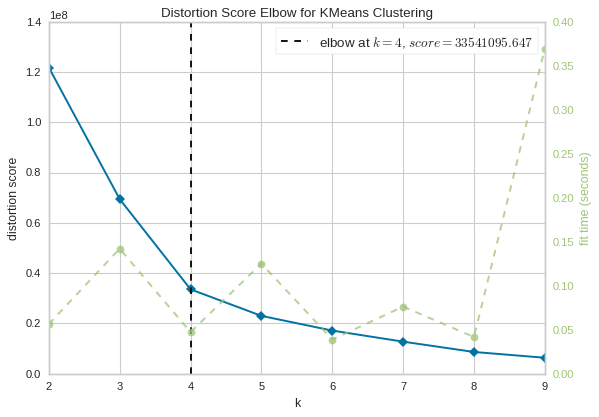

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f98b9937e80>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [ ]:
kelbow_visualizer(KMeans(random_state=4), auto[['mpg','price']], k=(2,10)) #4

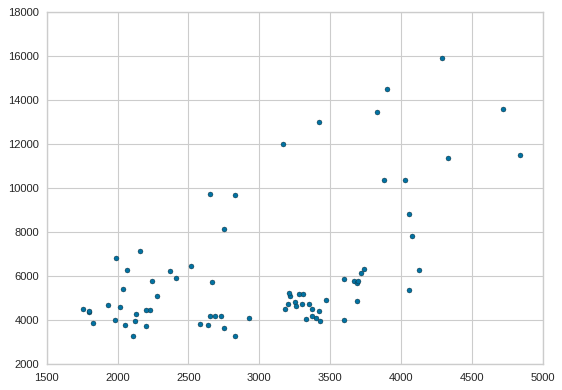

In [ ]:
fig, ax = plt.subplots()
ax.scatter(auto.weight,auto.price) #again 2 or 4

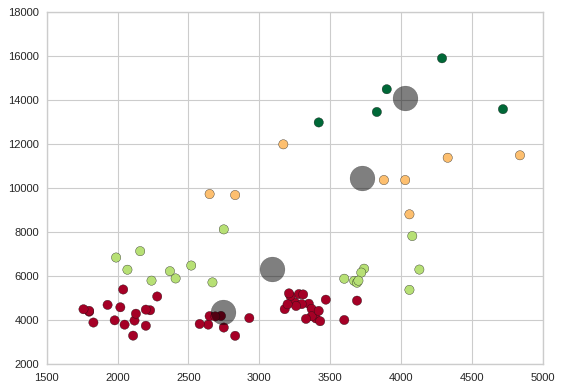

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(auto[['weight','price']])
y_kmeans = kmeans.predict(auto[['weight','price']])

fig, ax = plt.subplots()
ax.scatter(auto.weight,auto.price,c=y_kmeans,s=70, cmap='RdYlGn')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5);

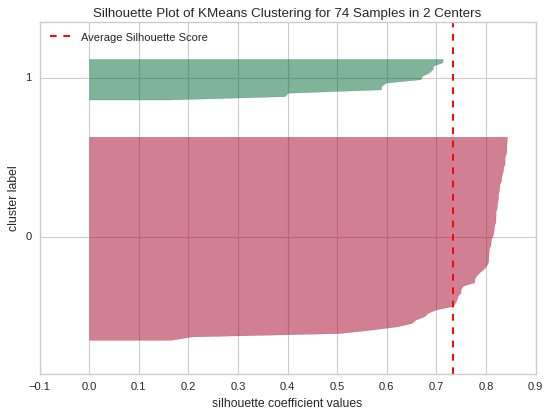

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f98bbb2e280>,
                     colors='RdYlGn',
                     estimator=KMeans(n_clusters=2, random_state=42))

In [ ]:
silhouette_visualizer(KMeans(2, random_state=42), auto[['weight','price']], colors='RdYlGn') #2

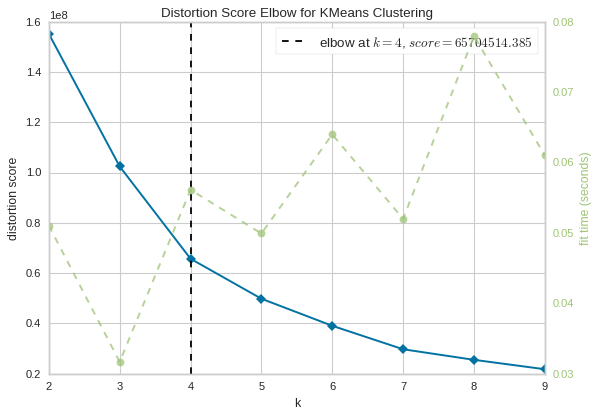

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f98bbdbc310>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [ ]:
kelbow_visualizer(KMeans(random_state=4), auto[['weight','price']], k=(2,10)) #4

### yellowbrick

https://www.scikit-yb.org/en/latest/index.html

handy, focused on vis, and small and simple, do check periodically and incorporate from there 




In [ ]:
#silhuette analysis [DONE incorporated in my auto example above]
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#like there is nice vis not just silhuette but also scatter fits; but complex code and breaks; just use yellowbrick as in here
from sklearn.cluster import KMeans

from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit

# Load a clustering dataset
X, y = load_credit()

# Specify rows to cluster: under 40 y/o and have either graduate or university education
X = X[(X['age'] <= 40) & (X['edu'].isin([1,2]))]
type(X)
# Use the quick method and immediately show the figure DONE: this is the line i incorporate in my stuff:
silhouette_visualizer(KMeans(5, random_state=42), X, colors='yellowbrick')

pandas.core.frame.DataFrame

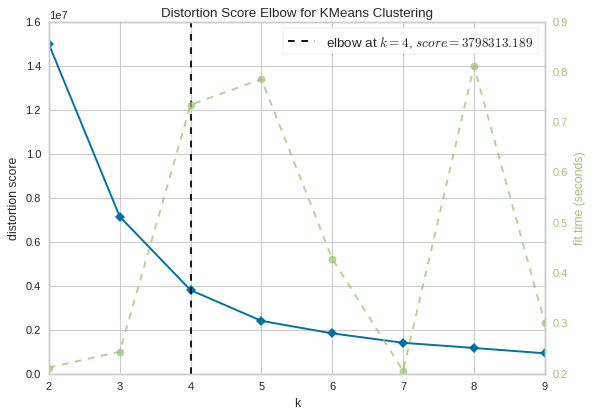

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f98b3742070>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [ ]:
#elbow https://www.scikit-yb.org/en/latest/api/cluster/elbow.html (quick method) [DONE incorporated in my auto example above]
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

X, y = load_nfl()

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), X, k=(2,10))

### https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

as usal this book is good! easy, straighforward, and so yeah followed   this in my example using auto as a core to start and then added from others like elbow/silhuette 

In [ ]:
blobs=pd.read_csv('https://raw.githubusercontent.com/theaok/vis/main/kmeans_blobs.csv')
colnames = list(blobs.columns[1:-1])
blobs.head(3)

ID       x       y  cluster
0   0  24.412  32.932        2
1   1  35.190  12.189        1
2   2  26.288  41.718        2

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(blobs[['x','y']])
y_kmeans = kmeans.predict(blobs[['x','y']])

KMeans(n_clusters=4)

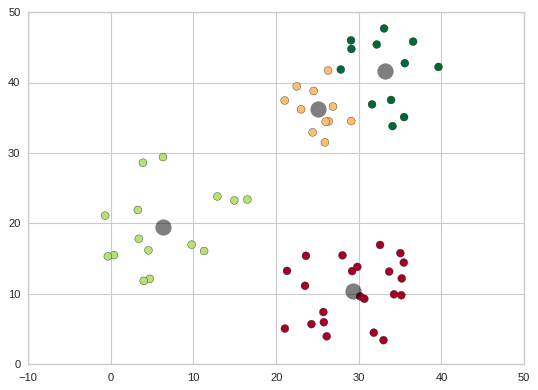

In [ ]:
plt.scatter(blobs.x, blobs.y, c=y_kmeans, s=50, cmap='RdYlGn')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5);

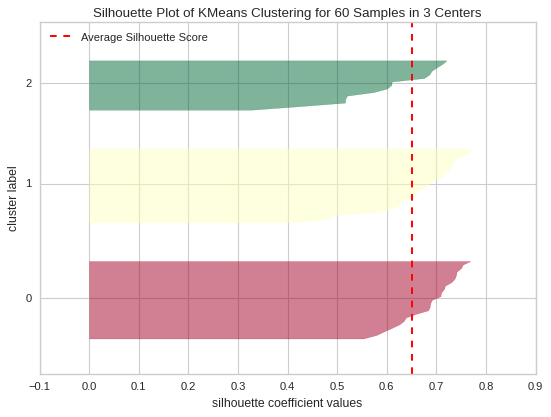

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f98b3851850>,
                     colors='RdYlGn',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [ ]:
silhouette_visualizer(KMeans(3, random_state=42), blobs[['x','y']], colors='RdYlGn')

### k-means by hand step by step
https://www.dominodatalab.com/blog/getting-started-with-k-means-clustering-in-python

Clustering analysis is an important area of unsupervised learning that helps us group data together.

duh this is great for understending the process but tediious; for vis class do a faster one!

In [ ]:
from matplotlib.colors import ListedColormap
blobs=pd.read_csv('https://raw.githubusercontent.com/theaok/vis/main/kmeans_blobs.csv')
colnames = list(blobs.columns[1:-1])
blobs.head(3)

ID       x       y  cluster
0   0  24.412  32.932        2
1   1  35.190  12.189        1
2   2  26.288  41.718        2

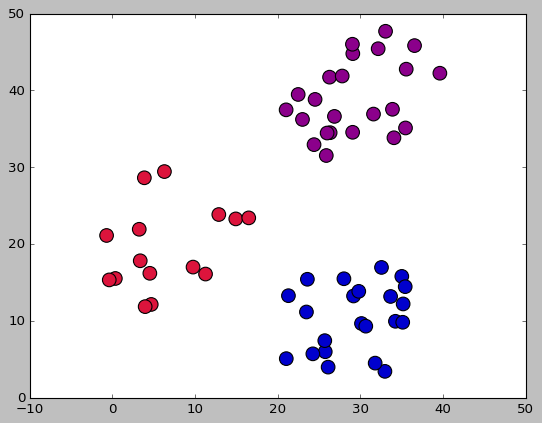

In [ ]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150,
            c=blobs['cluster'].astype('category'), 
            cmap = customcmap);

In [ ]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df = blobs[['x','y']]
centroids = initiate_centroids(k, df)
centroids

x       y
0   24.412  32.932
5   25.893  31.515
36  26.878  36.609

In [ ]:
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2)) 

for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))


Error for centroid 0: 384.22
Error for centroid 1: 724.64
Error for centroid 2: 0.00


In [ ]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [ ]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

<ipython-input-14-e891e7f5dc1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


x       y  centroid          error
0  24.412  32.932         0       0.000000
1  35.190  12.189         1  211534.211314
2  26.288  41.718         2     699.601495
3   0.376  15.506         0  776856.744109
4  26.116   3.963         1  576327.599678

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

(array([ 0., 10., 20., 30., 40., 50.]),
 <a list of 6 Text major ticklabel objects>)

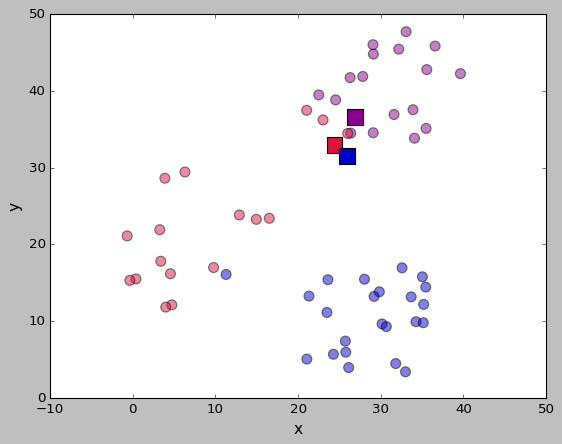

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
print("The total error is {0:.2f}".format(df['error'].sum()))

The total error is 11927659.01


In [ ]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

x          y
0   9.889444  23.242611
1  28.435750  11.546250
2  30.759333  40.311167

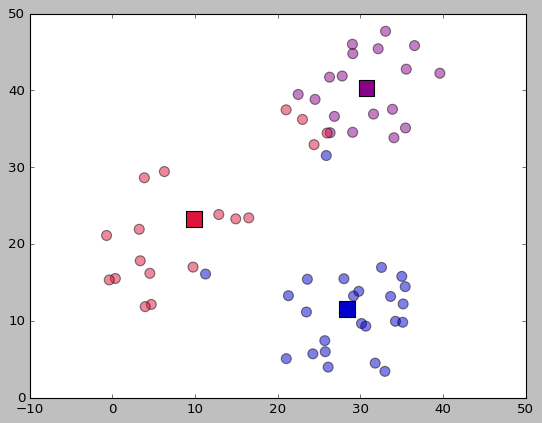

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200,
            c=[0, 1, 2], cmap = customcmap);

In [ ]:
def kmeans(dset, k=2, tol=1e-4):
    '''
    K-means implementationd for a 
    `dset`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the 
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0
    
    # Step 2: Initiate clusters by defining centroids 
    centroids = initiate_centroids(k, dset)

    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        
        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

In [ ]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['x','y']], 3)
df.head()

x       y  centroid        error
0  24.412  32.932         2  3767.568743
1  35.190  12.189         1  1399.889001
2  26.288  41.718         2   262.961097
3   0.376  15.506         0  2683.086425
4  26.116   3.963         1  2723.650198

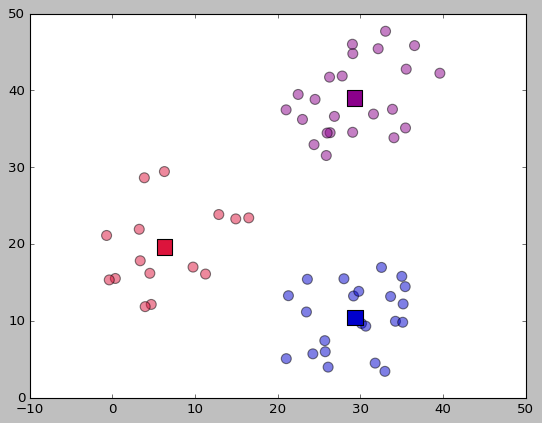

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap);

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Total error')

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Text major ticklabel objects>)

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000., 8000000.]),
 <a list of 9 Text major ticklabel objects>)

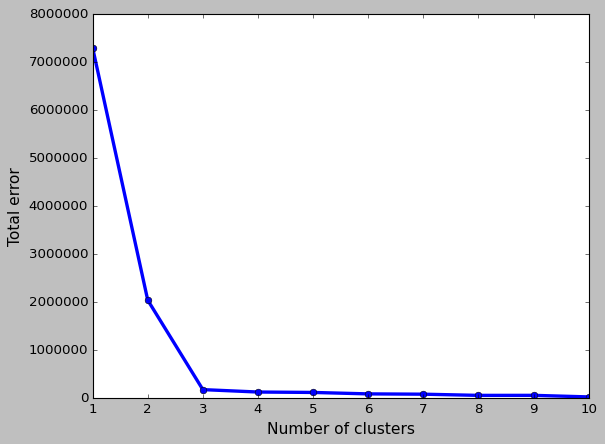

In [ ]:
err_total = []
n = 10

df_elbow = blobs[['x','y']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)

and theres more on the guy's website

### k-means pokemons

handy dataset may use it more + adalyn!

#### k-means quick and dirty, general idea
 https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489


In [ ]:
#!wget -q -O p.csv https://www.kaggle.com/datasets/abcsds/pokemon/download?datasetVersionNumber=2
df = pd.read_csv('https://github.com/theaok/vis/raw/main/po.zip')
df.head(3)

#       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2    Ivysaur  Grass  Poison    405  60      62       63       80       80   
2  3   Venusaur  Grass  Poison    525  80      82       83      100      100   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False

In [ ]:
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary', '#']
df = df[types].drop(columns = drop_cols)
df.head()

Name  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0              Bulbasaur    318  45      49       49       65       65     45
1                Ivysaur    405  60      62       63       80       80     60
2               Venusaur    525  80      82       83      100      100     80
3  VenusaurMega Venusaur    625  80     100      123      122      120     80
4             Charmander    309  39      52       43       60       50     65

In [ ]:
#3 clusters, get their centroids, and set some colors; BUT need to do that elbow siluethe thingey
from sklearn.cluster import KMeans
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

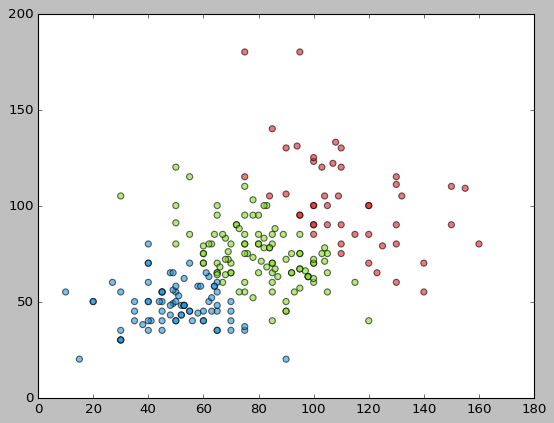

In [ ]:
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=30)

In [ ]:
#the stuff below there must be easier way

(0.0, 200.0)

(0.0, 200.0)

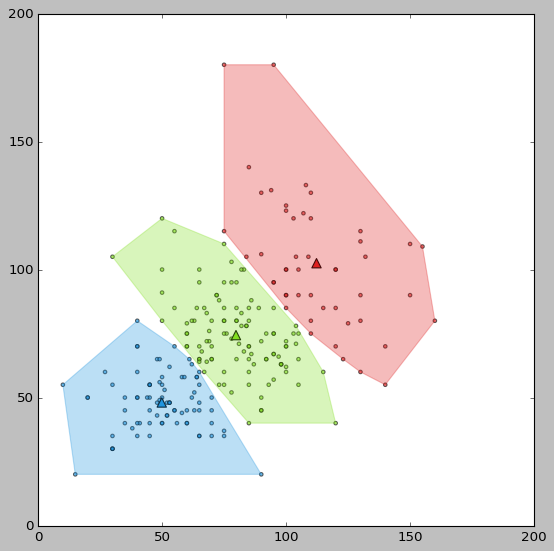

In [ ]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Attack', 'Defense']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
plt.xlim(0,200)
plt.ylim(0,200)

#### EDA clustering and classification: looks solid
https://www.kaggle.com/code/pratik1120/pokemon-eda-clustering-and-classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

data =  pd.read_csv('https://github.com/theaok/vis/raw/main/po.zip')
data.drop('#', axis=1, inplace=True)



plt.style.use('default')


Text(0.5, 1.0, 'Correlation')

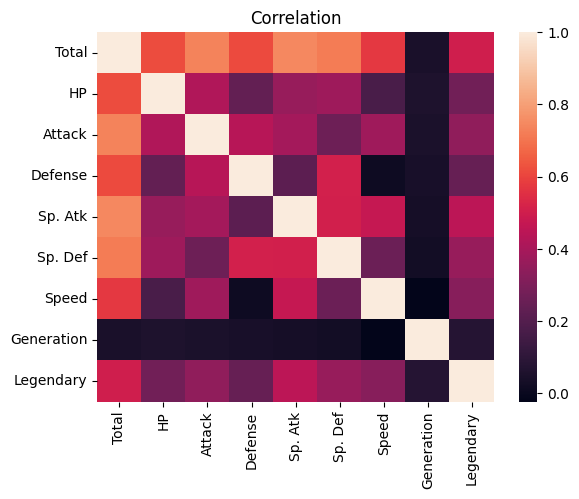

In [ ]:
sns.heatmap(data.corr())
plt.title('Correlation')
plt.show()

In [ ]:
fig = data.isnull().sum().reset_index().plot(kind='bar', x='index', y=0)
fig.update_layout(title='Missing values plot', xaxis_title='Columns', yaxis_title='Missing Count')

In [ ]:
fig = data['Type 1'].value_counts().reset_index().plot(kind='bar', y='index', x='Type 1', color='Type 1')
fig.update_layout(title='Abilities of Pokemons', yaxis_title='Ability', xaxis_title='Count')

Text(0.5, 1.0, 'KDE Plot for Total Strength')

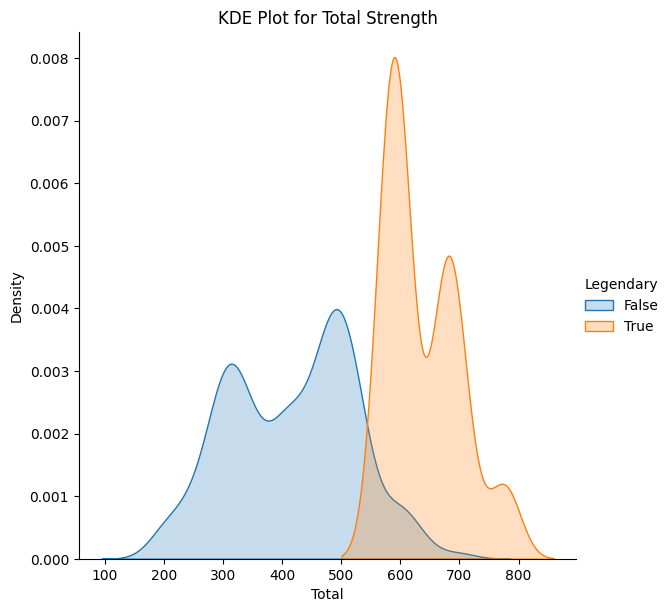

In [ ]:
sns.FacetGrid(data, hue="Legendary", height=6,).map(sns.kdeplot, "Total",shade=True).add_legend()
plt.title('KDE Plot for Total Strength')

Pairplot segregated on generation


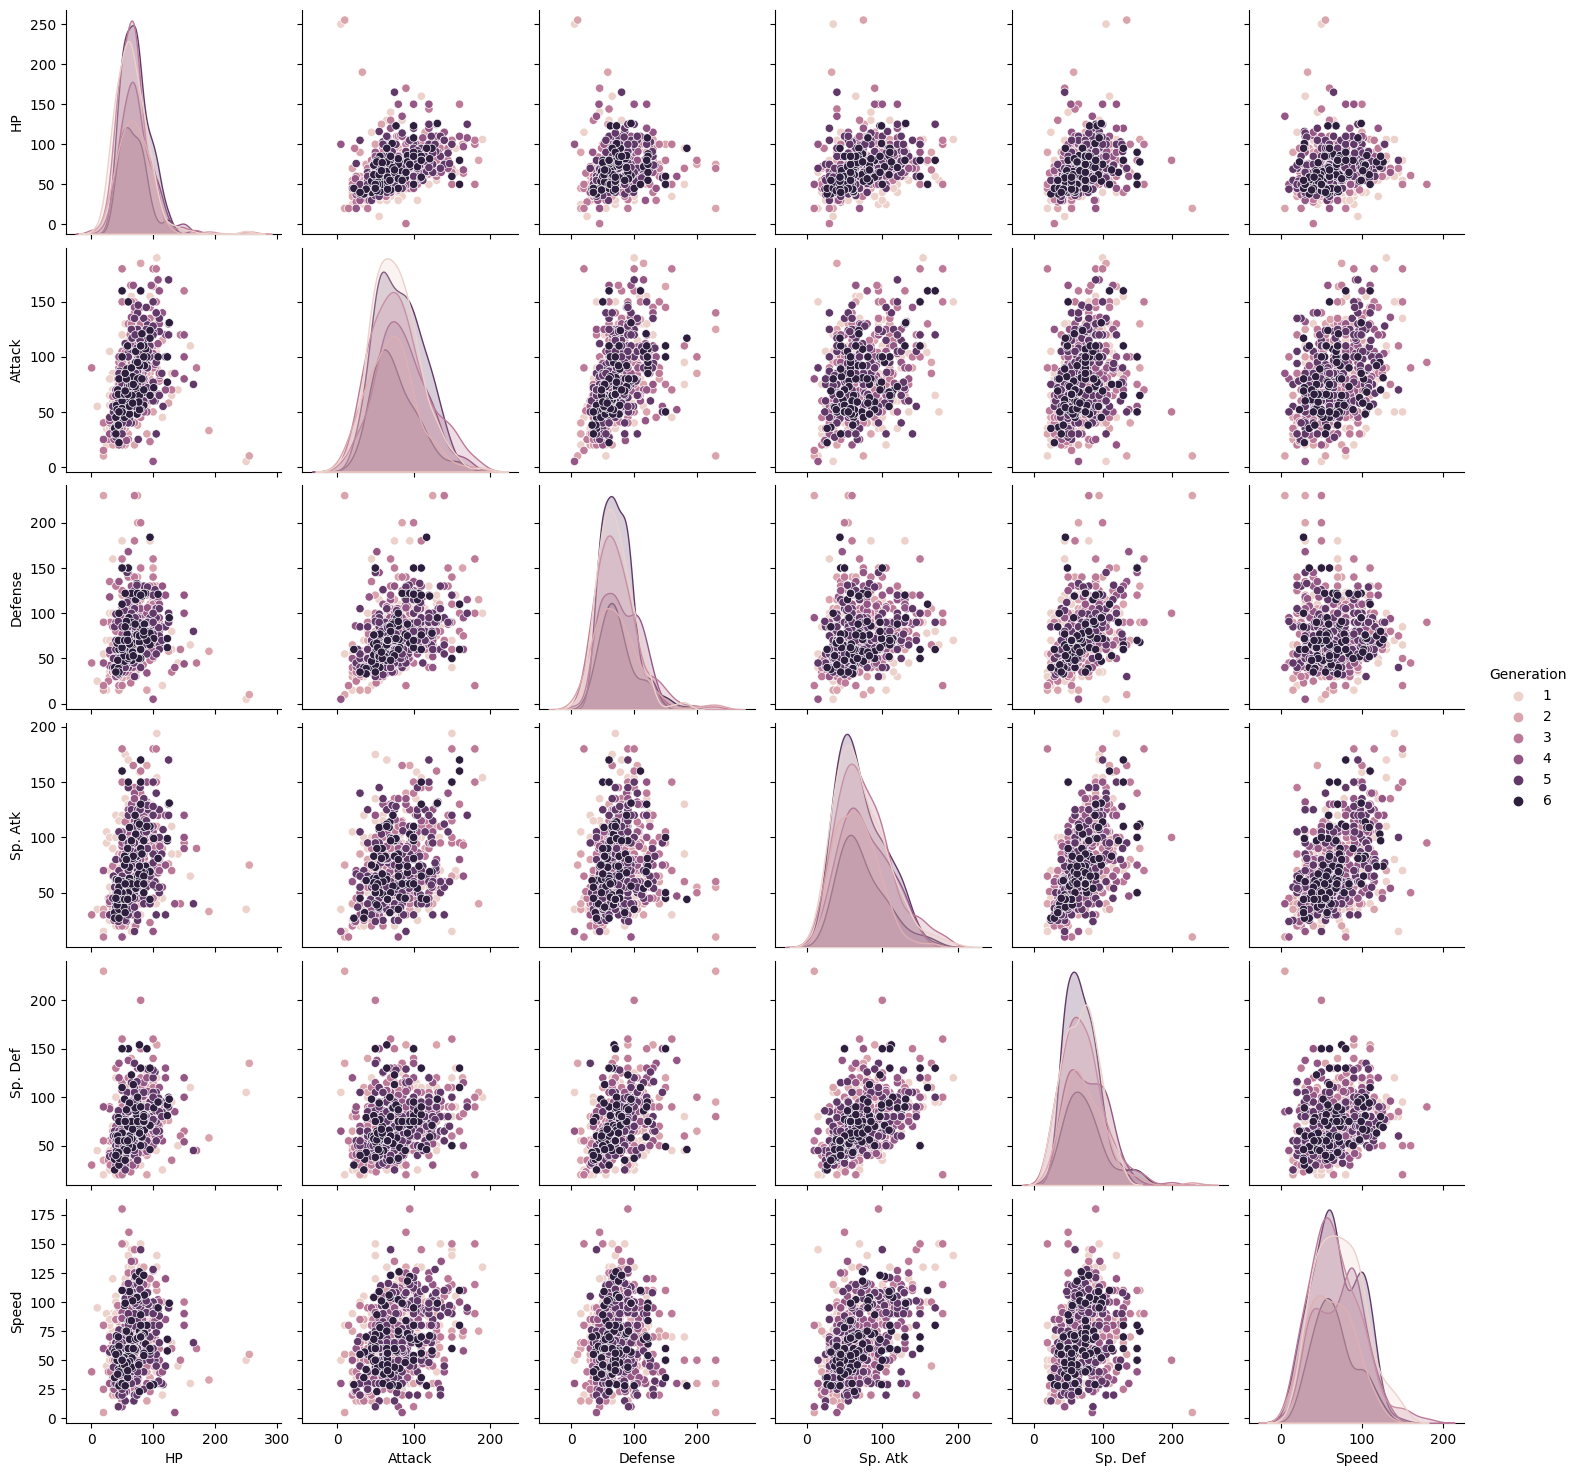

In [ ]:
sns.pairplot(data=data[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']], hue='Generation')
print('Pairplot segregated on generation')
plt.show()

Pairplot segregated on Legendariness


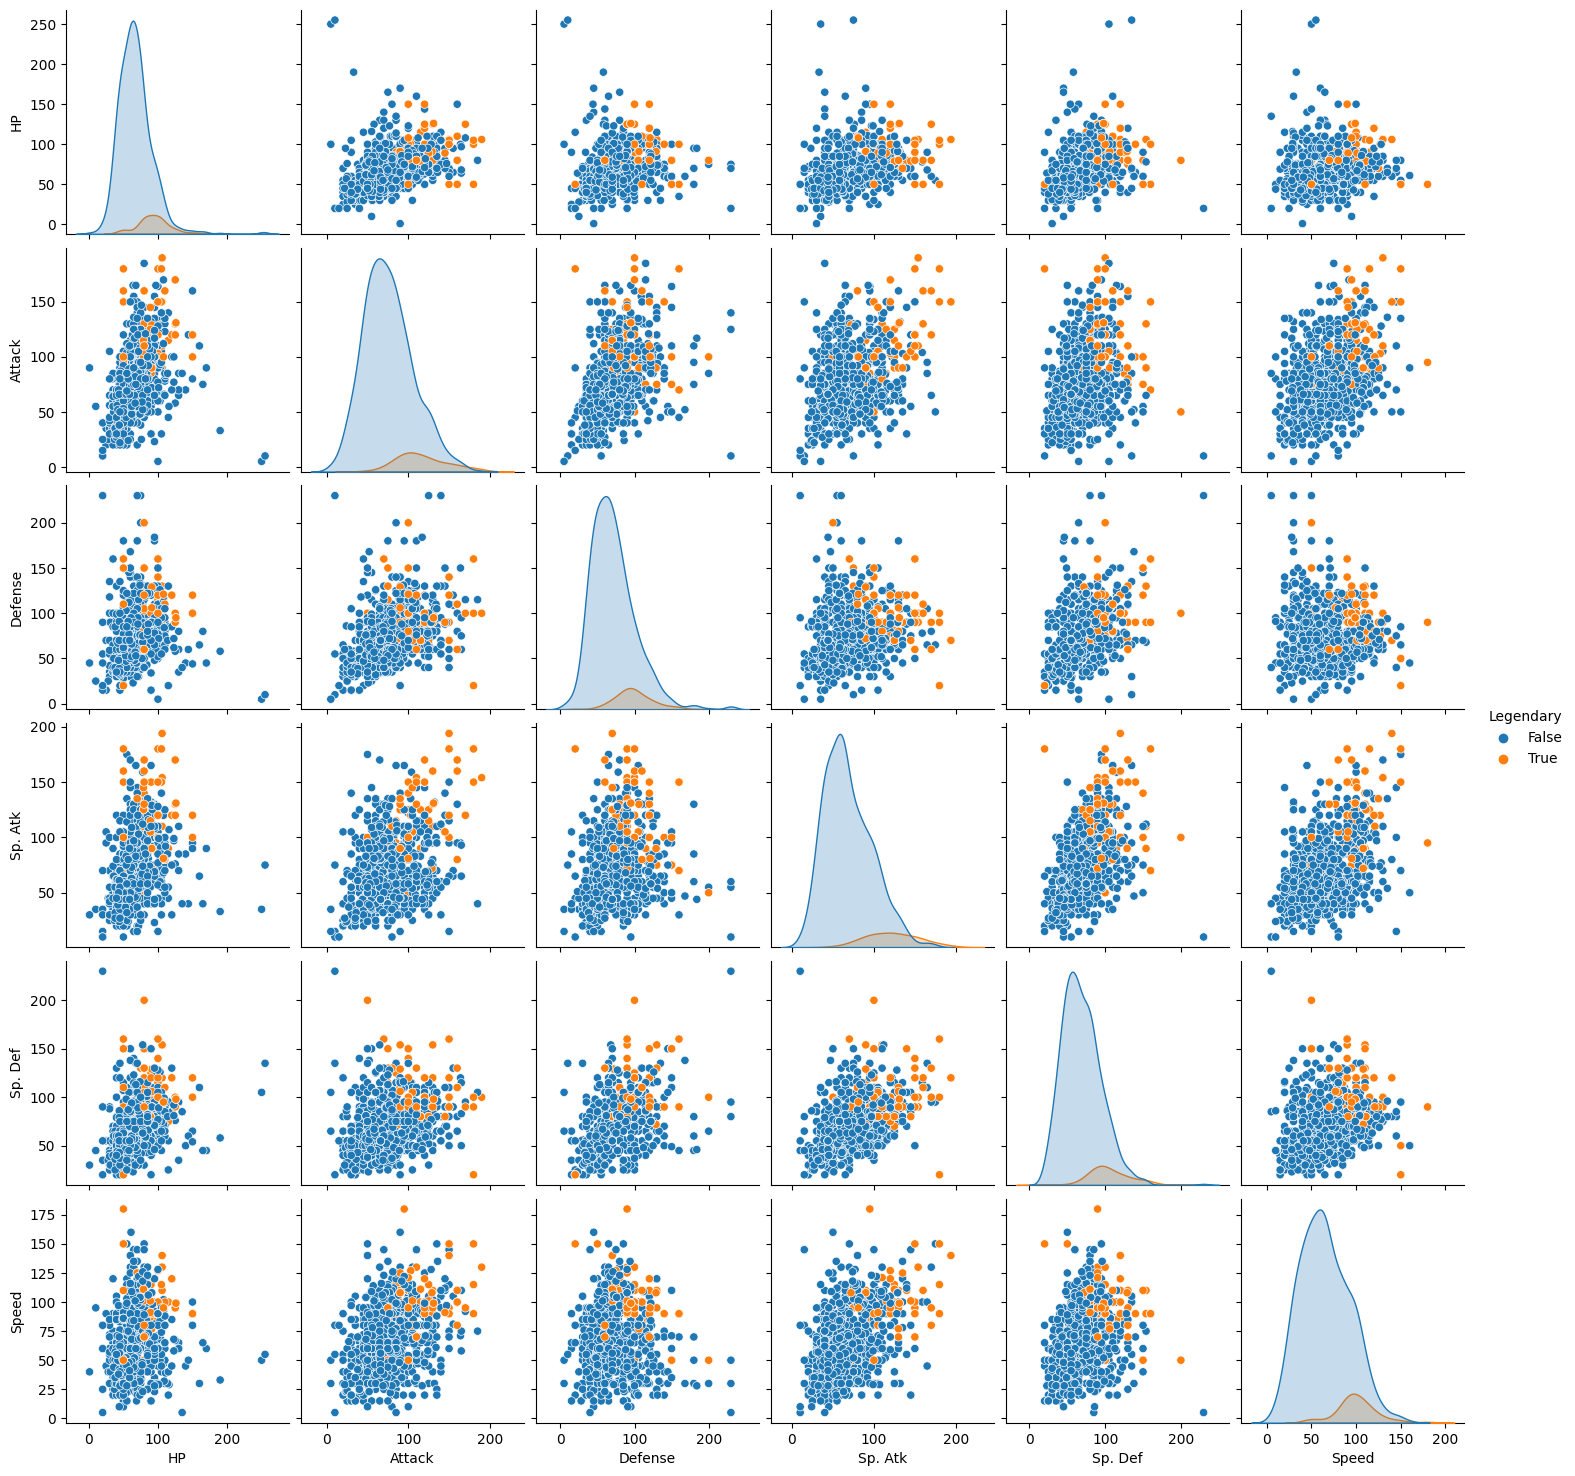

In [ ]:
sns.pairplot(data=data[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']], hue='Legendary')
print('Pairplot segregated on Legendariness')
plt.show()

In [ ]:
#treating outliers based on boxplot :) yes! do that

Text(0.5, 1.0, 'HP /b Legendary')

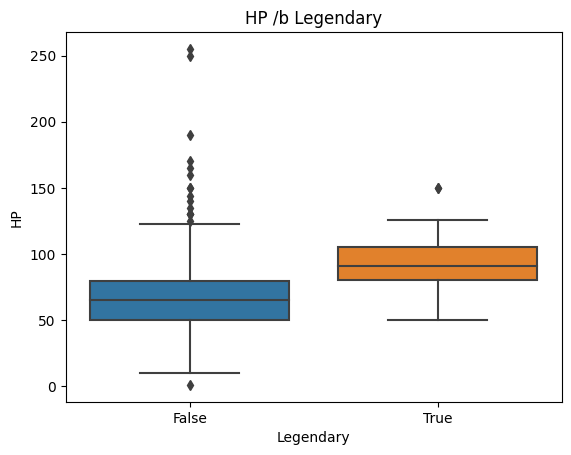

In [ ]:
sns.boxplot(data=data, x='Legendary', y='HP')
plt.title('HP /b Legendary')
plt.show()

In [ ]:
data[(data['HP']>160) | (data['HP']==data['HP'].min())]


Name   Type 1 Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  \
121    Chansey   Normal    NaN    450  250       5        5       35      105   
217  Wobbuffet  Psychic    NaN    405  190      33       58       33       58   
261    Blissey   Normal    NaN    540  255      10       10       75      135   
316   Shedinja      Bug  Ghost    236    1      90       45       30       30   
351    Wailord    Water    NaN    500  170      90       45       90       45   
655  Alomomola    Water    NaN    470  165      75       80       40       45   

     Speed  Generation  Legendary  
121     50           1      False  
217     33           2      False  
261     55           2      False  
316     40           3      False  
351     60           3      False  
655     65           5      False

In [ ]:
data = data.drop([121, 261, 316]).reset_index(drop=True)


Text(0.5, 1.0, 'Attack /b Generation')

Text(0.5, 1.0, 'Defense /b Generation')

Text(0.5, 1.0, 'Speed /b Legendary')

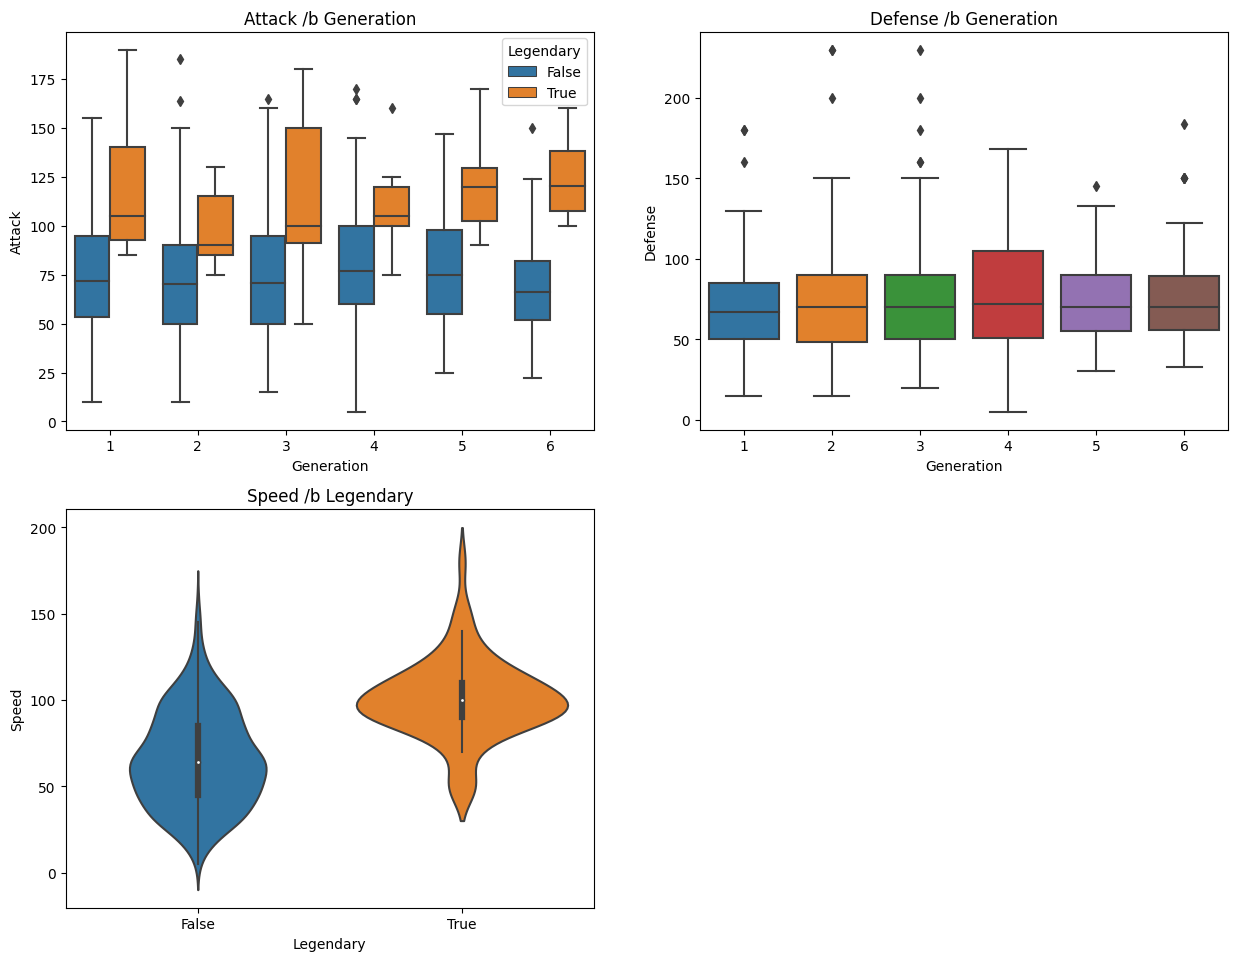

In [ ]:
fig = plt.figure(figsize=(15,30))
fig.add_subplot(5,2,1)
sns.boxplot(data=data, x='Generation', y='Attack', hue='Legendary')
plt.title('Attack /b Generation')

fig.add_subplot(5,2,2)
sns.boxplot(data=data, x='Generation', y='Defense')
plt.title('Defense /b Generation')

fig.add_subplot(5,2,3)
sns.violinplot(data=data, x='Legendary', y='Speed')
plt.title('Speed /b Legendary')
plt.show()

and it continues may do it later again looks solid, nevertheless somewhat boring

#### des stats very neat!
Pokemon gotta catch em all

https://www.kaggle.com/code/kushojha12/pokemon-gotta-catch-em-all

DONE: heatmap and suburst in class notebook plotly.ipynb

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('https://github.com/theaok/vis/raw/main/po.zip')

In [ ]:
df.isna().sum() 
df.info()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
px.density_heatmap(df, x="Type 1", y="Type 2", marginal_x="histogram", marginal_y="histogram")

In [ ]:
fig = px.sunburst(df, path=[px.Constant("Pokemon Gens"), 'Generation', 'Type 1'], color = 'Total',
                    color_continuous_scale='Rainbow',
                    color_continuous_midpoint=df.Total.mean()
                 )
fig.update_layout(
    title_text = 'Distribution of Pokemon types per generation'
)